# Car Price Prediction Model¶
## Objective:

The primary goal of this project is to develop a machine learning model capable of accurately predicting the price of cars based on various attributes such as make, model, year, mileage, and other relevant features.

## Data:

Source: Kaggle

Steps Overview:

Data Preprocessing: Handling missing data, outliers, and encoding categorical features.

Exploratory Data Analysis (EDA): Visualizing feature distributions and relationships to the target variable (car price).

Modeling: Training machine learning models like Linear Regression, Random Forest, and Gradient Boosting to predict car prices.

Evaluation: Assessing models using performance metrics such as R², Mean Squared Error, and selecting the best-performing model.

In [112]:
!pip3 install kagglehub

In [114]:
!pip3 install kaggle


In [116]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: /Users/tomasgarcia/.cache/kagglehub/datasets/hellbuoy/car-price-prediction/versions/1


In [118]:
import os

# Ver los archivos descargados
print("Archivos disponibles en el path:", os.listdir(path))


Archivos disponibles en el path: ['CarPrice_Assignment.csv', 'Data Dictionary - carprices.xlsx']


In [120]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [122]:
# Construir la ruta completa al archivo CSV
csv_file = os.path.join(path, 'CarPrice_Assignment.csv')

# Cargar el dataset
df = pd.read_csv(csv_file)

# Ver las primeras filas del dataframe
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [125]:
df.shape

(205, 26)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [129]:
CompanyName=df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,'CompanyName',CompanyName)
df.drop(['CarName','car_ID','symboling'],axis=1,inplace=True)
df.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [131]:
df.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CompanyName,205,28,toyota,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205.0,NaN,NaN,NaN,98.76,6.02,86.6,94.5,97.0,102.4,120.9
carlength,205.0,NaN,NaN,NaN,174.05,12.34,141.1,166.3,173.2,183.1,208.1
carwidth,205.0,NaN,NaN,NaN,65.91,2.15,60.3,64.1,65.5,66.9,72.3


In [156]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [158]:
def replace_name(x,y):
    df['CompanyName'].replace(x,y,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

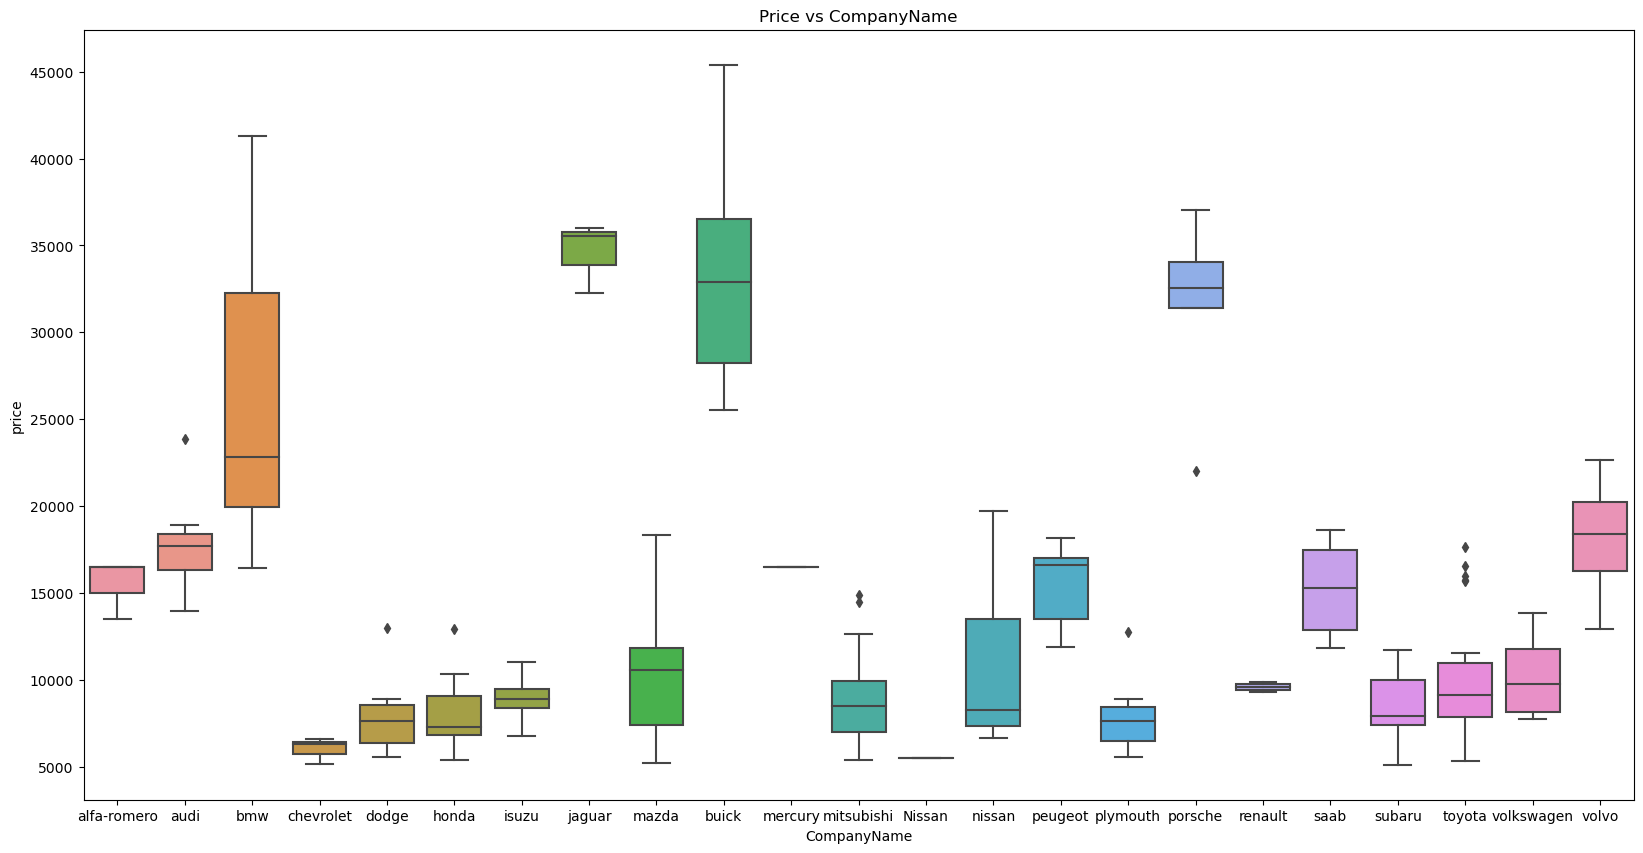

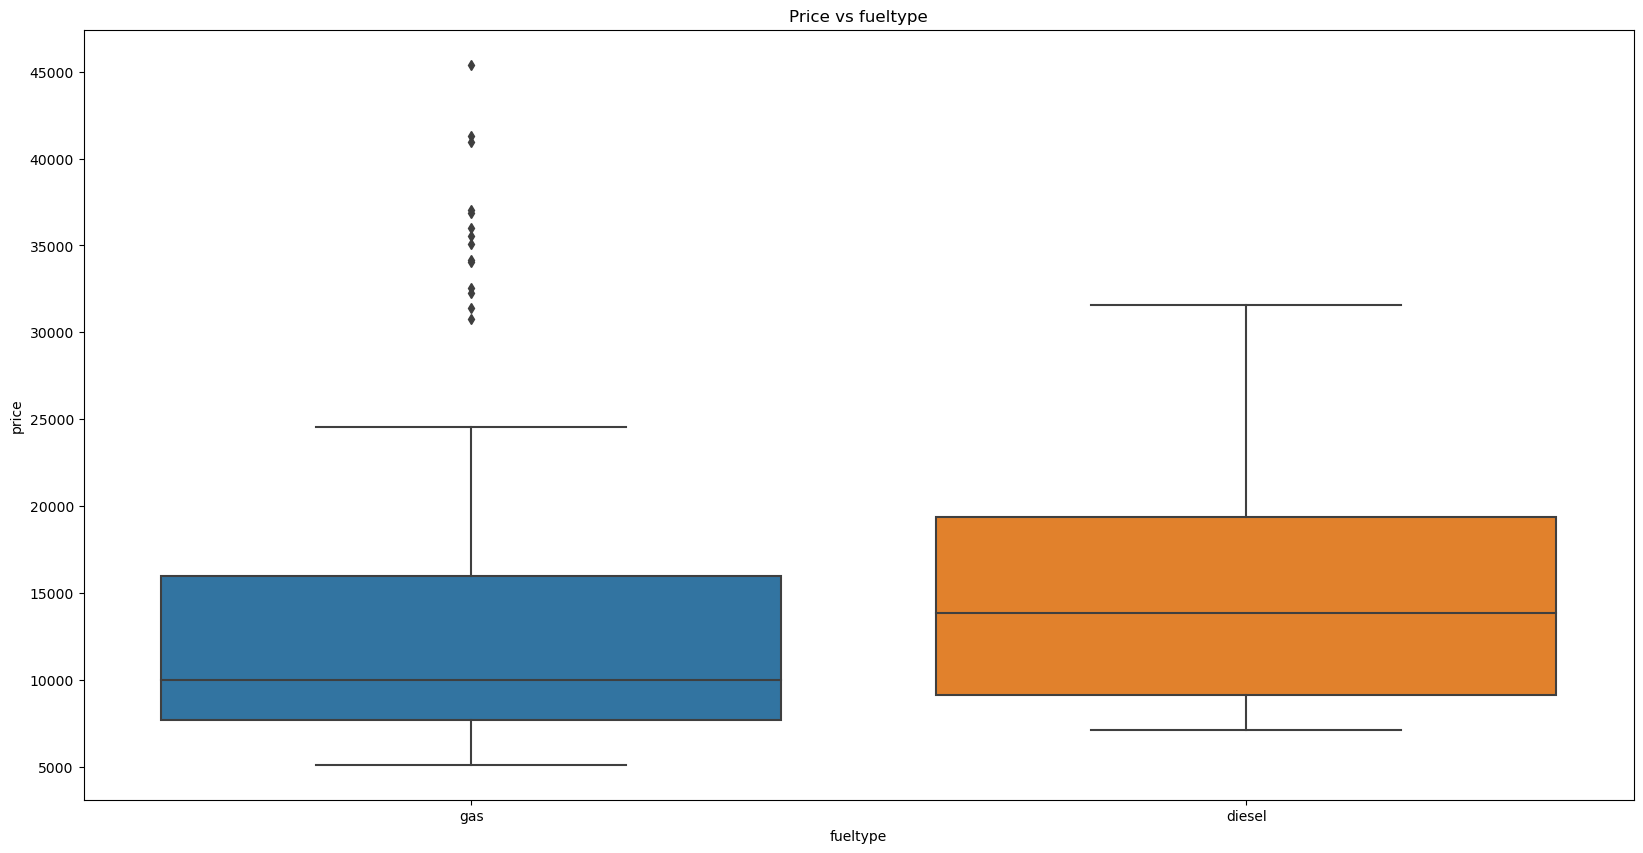

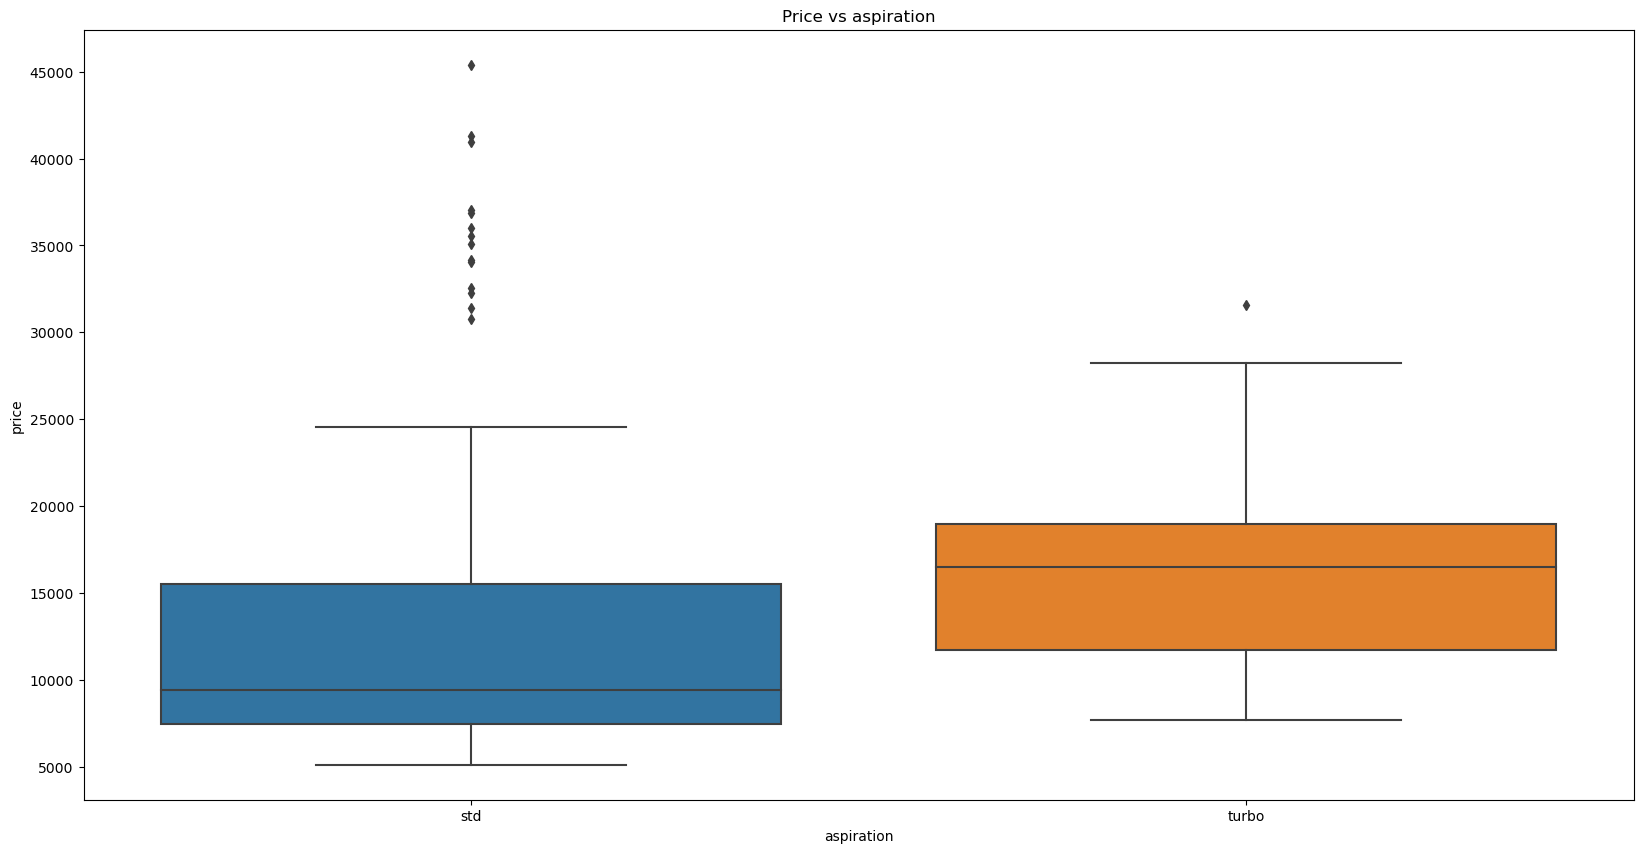

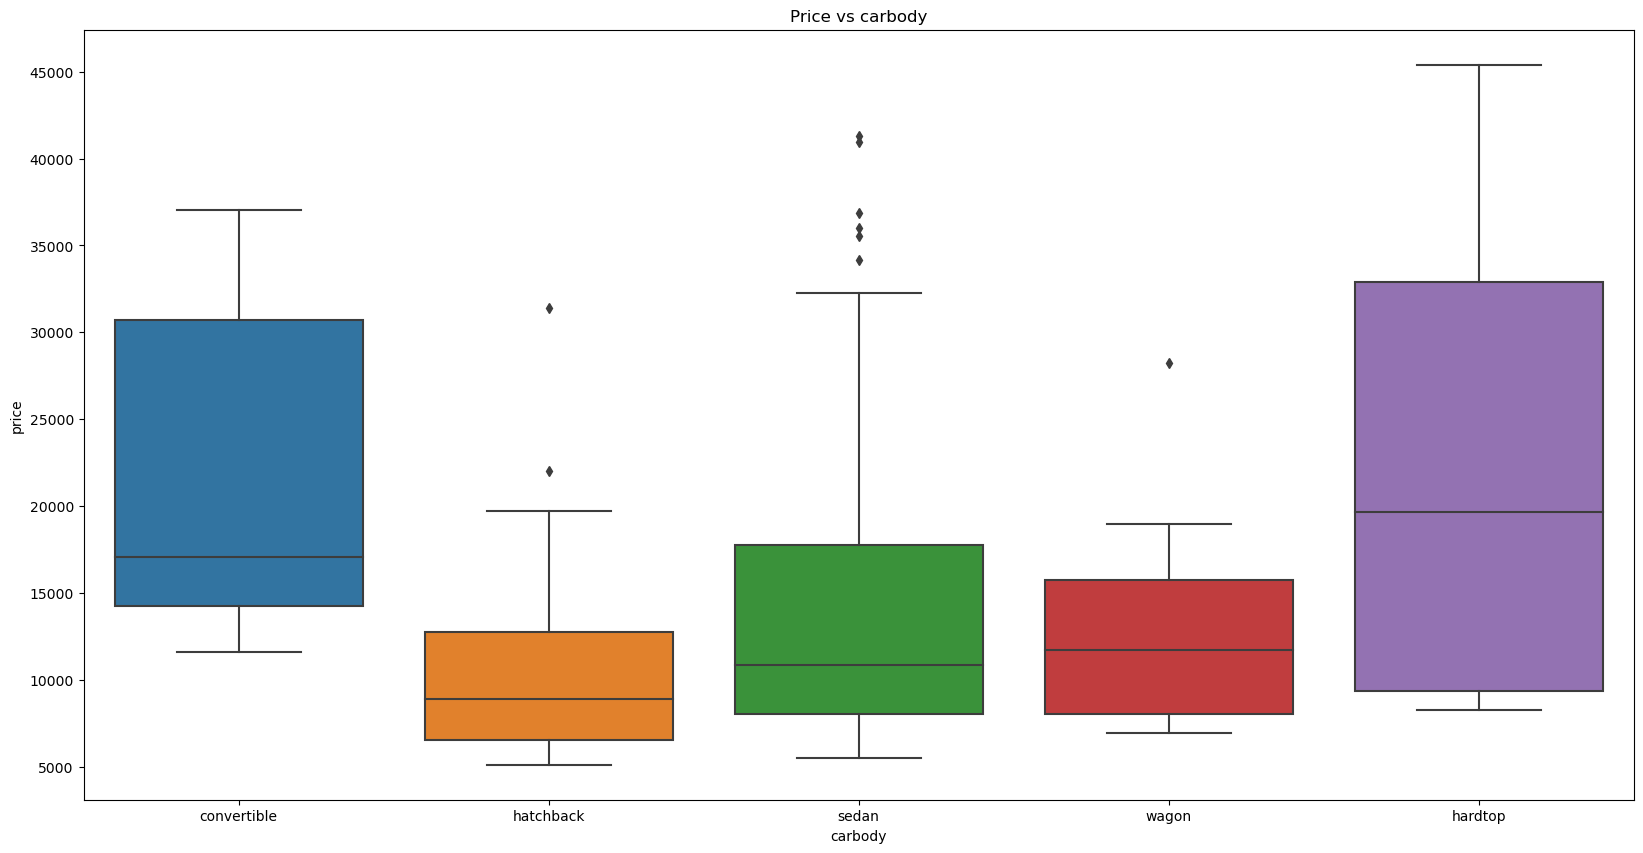

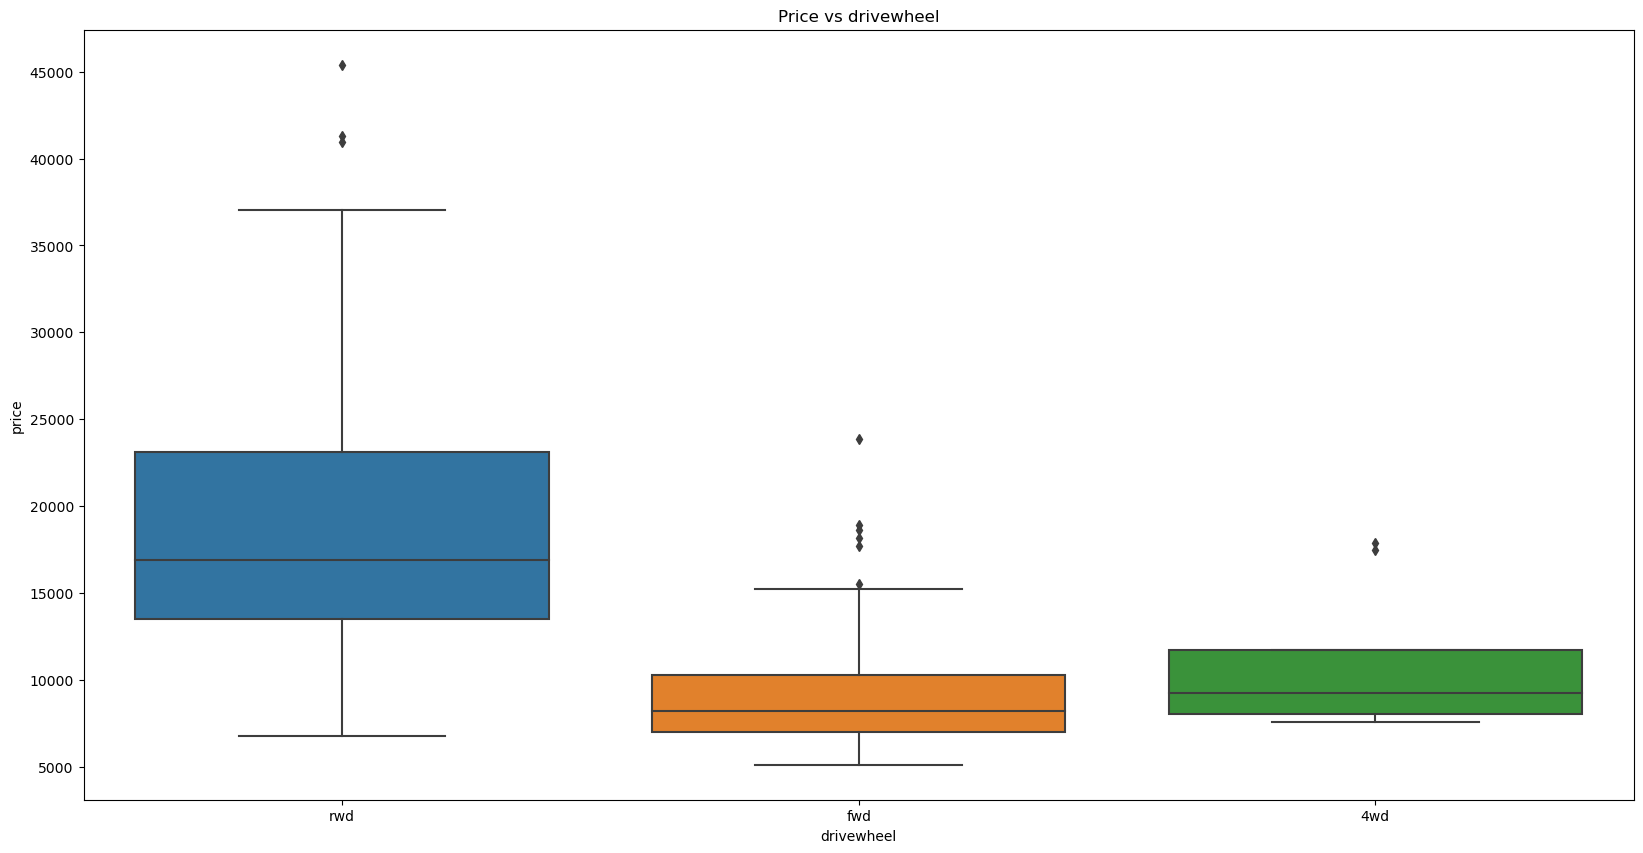

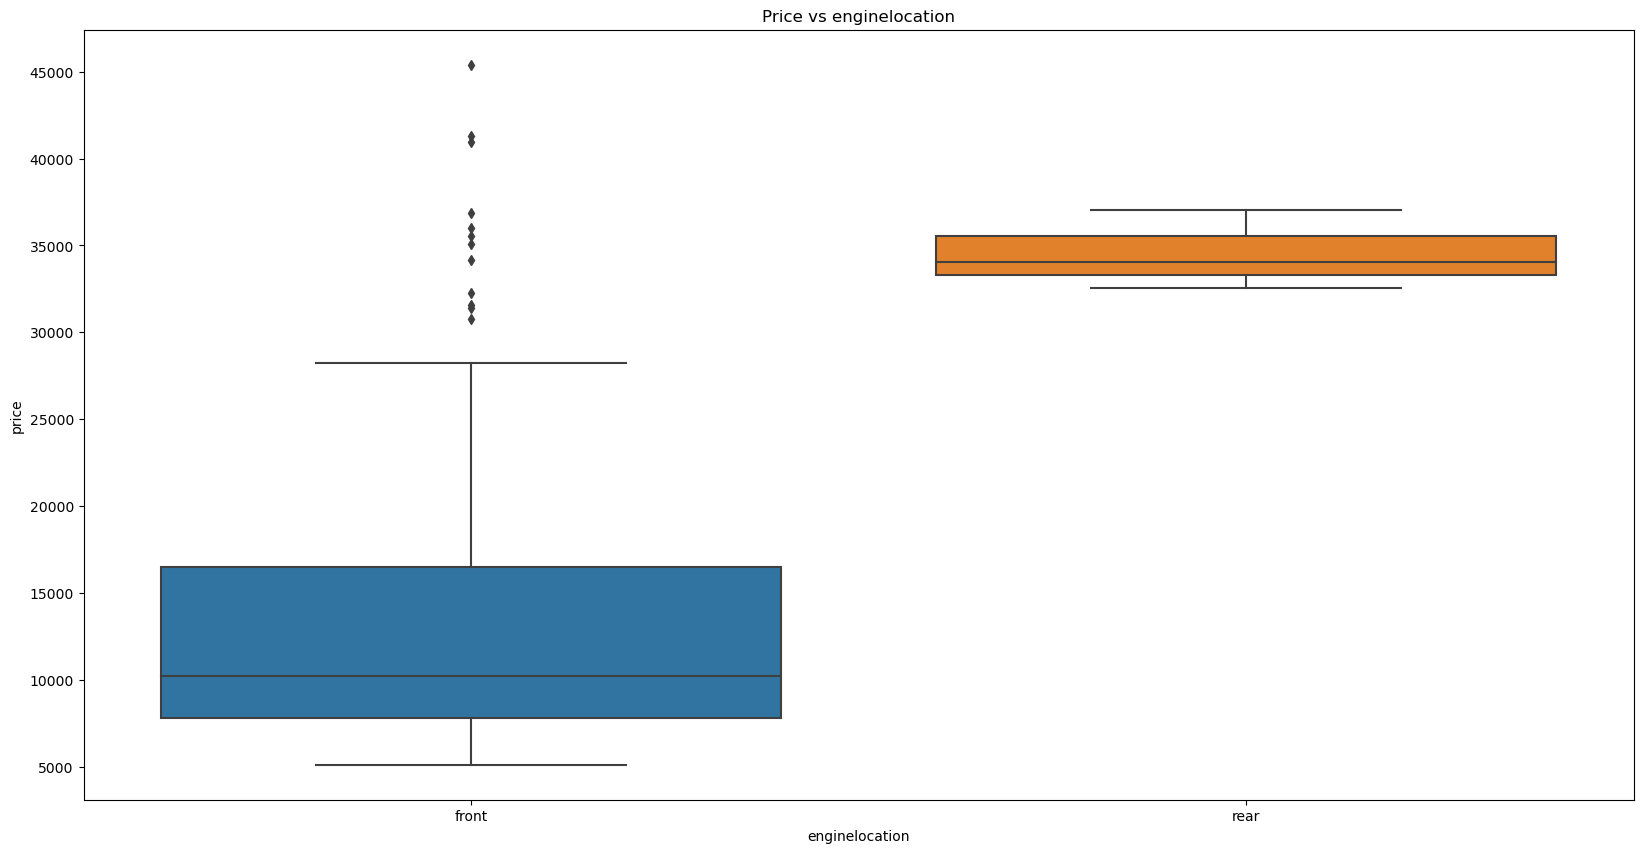

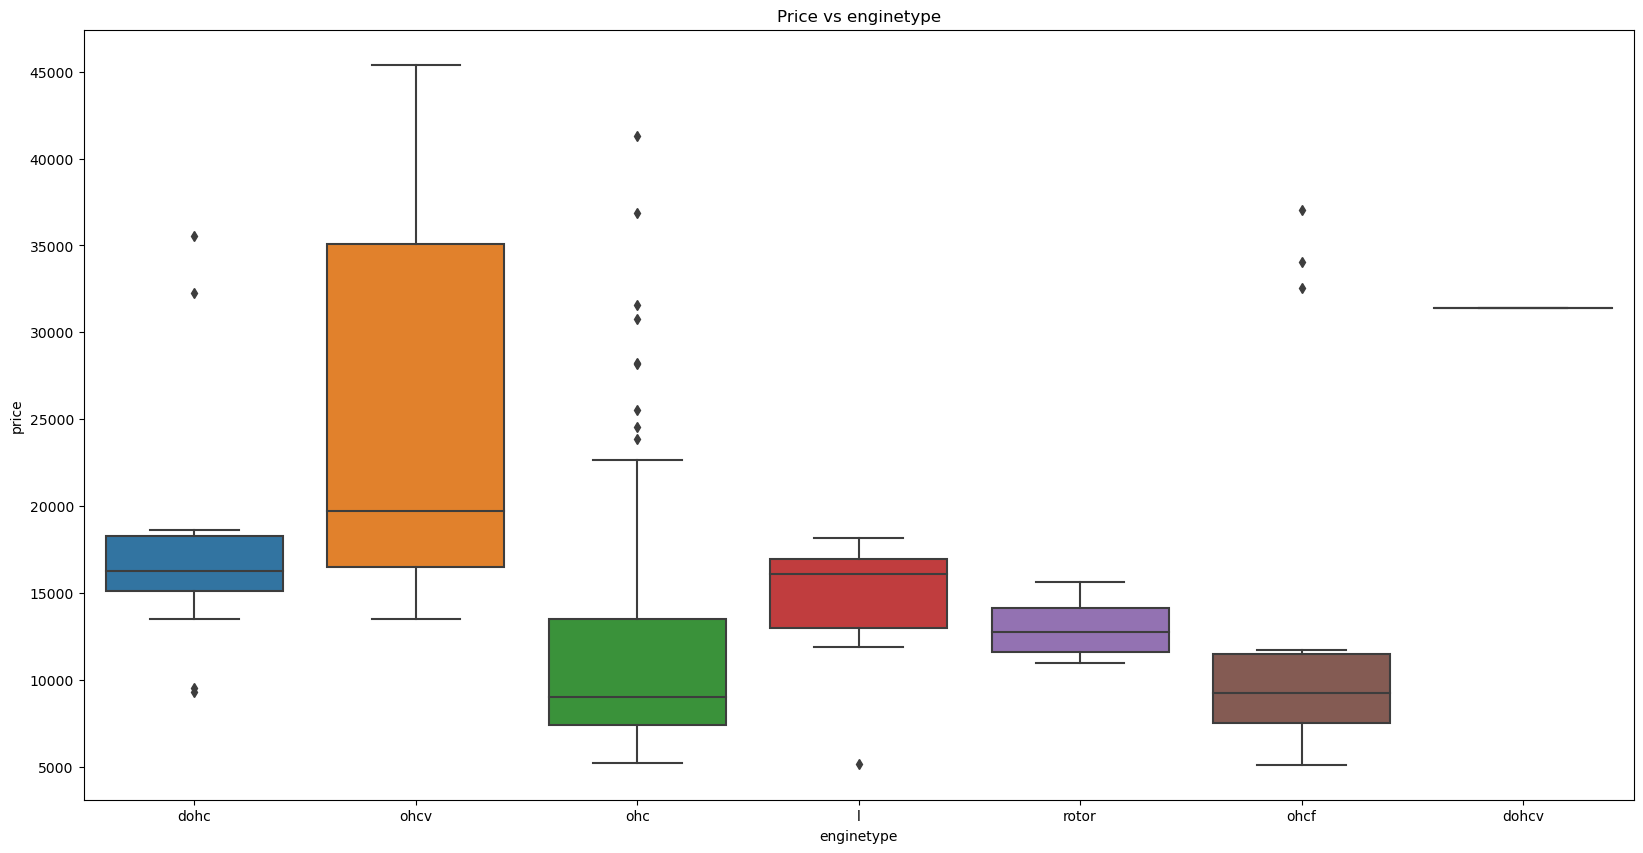

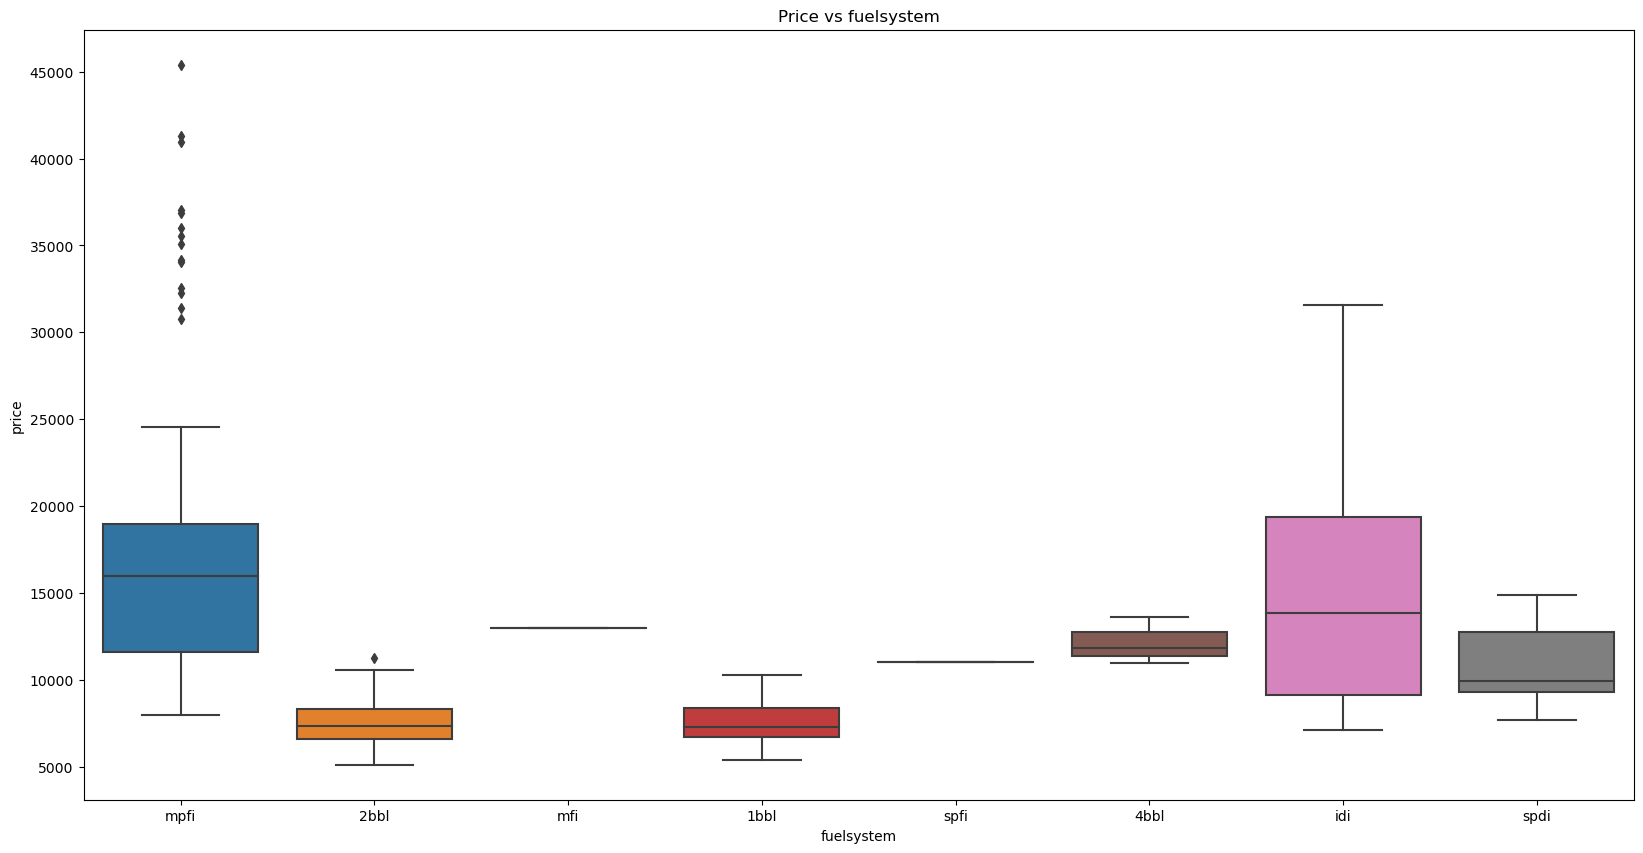

In [162]:
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    plt.figure(figsize=(20,10))
    sns.boxplot(data=df, x=df[col], y=df['price'])
    plt.title("Price vs "+ col)
    plt.show()

In [139]:
df['price'].describe([0.25,0.50,0.75,0.85,0.90,1])
#So Car Prices Under 16500 

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

[Text(0.5, 0, 'Car company'), Text(0, 0.5, 'Frequency of company')]

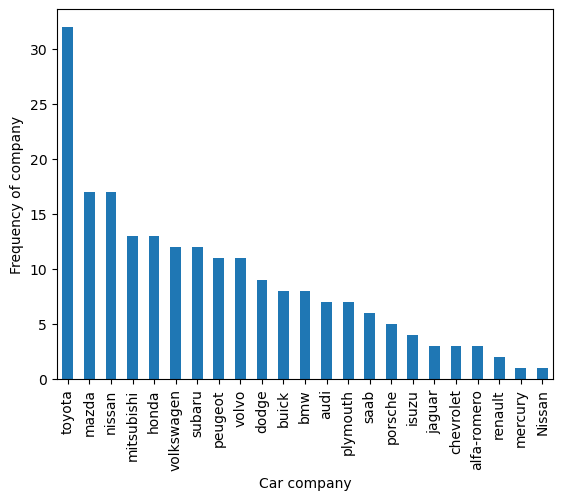

In [141]:
companies=df['CompanyName'].value_counts().plot(kind='bar')
companies.set(xlabel = 'Car company', ylabel='Frequency of company')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [168]:
df['doornumber'] = df['doornumber'].replace({'four': 4, 'two': 2}).astype('int64')
# object_columns cylindernumber

In [147]:
df['doornumber'] = df['doornumber'].replace({'four': 4, 'two': 2}).astype('int64')

df['cylindernumber'] = df['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}
                                                       ).astype('int64')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompanyName       205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

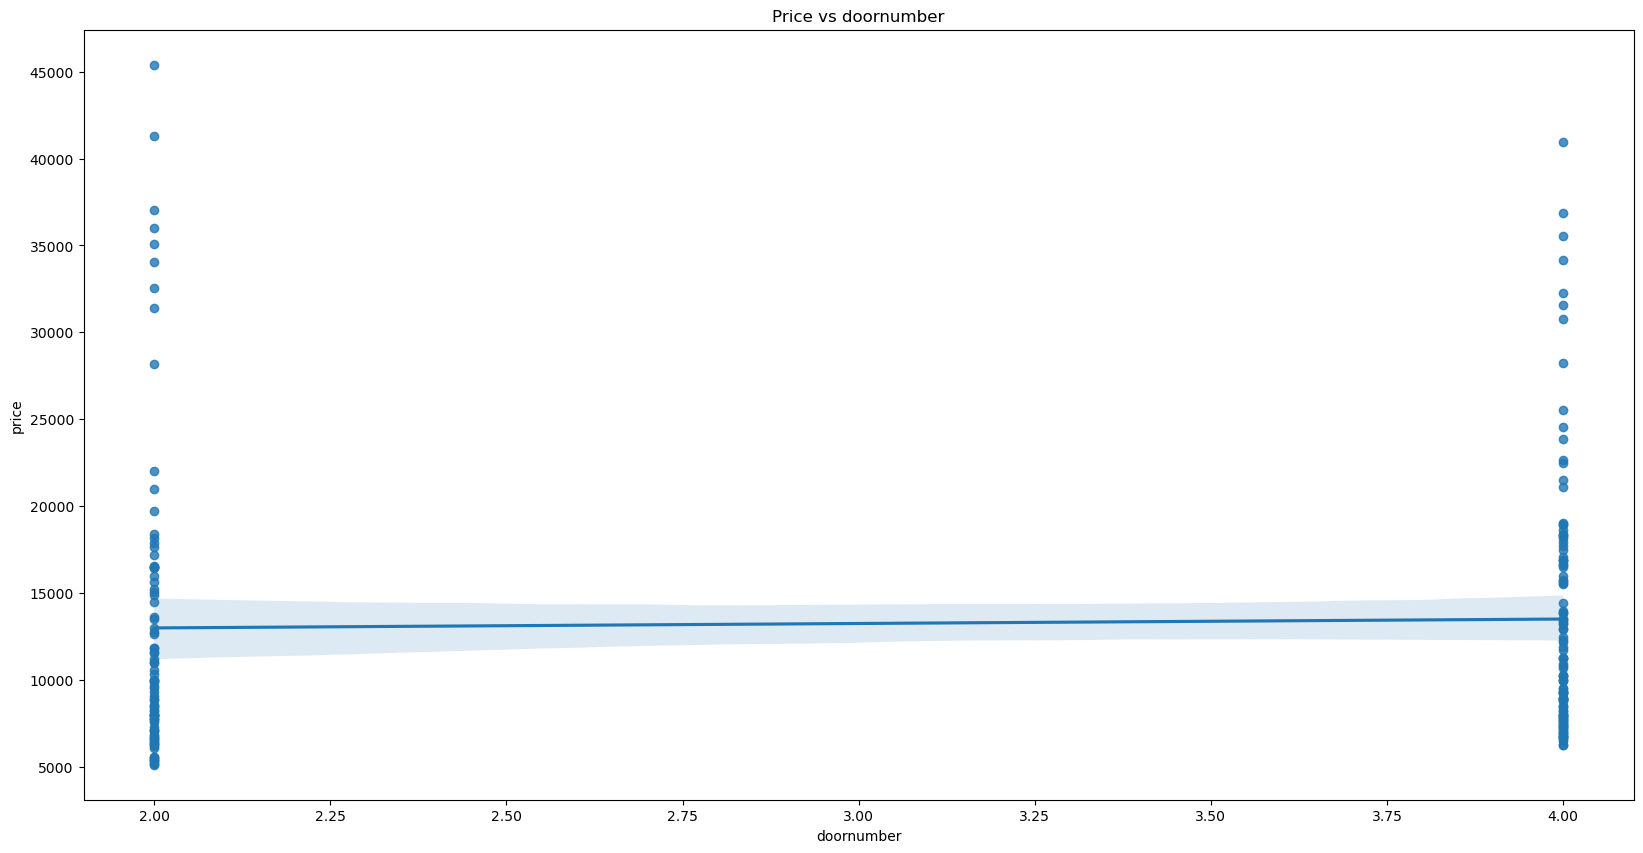

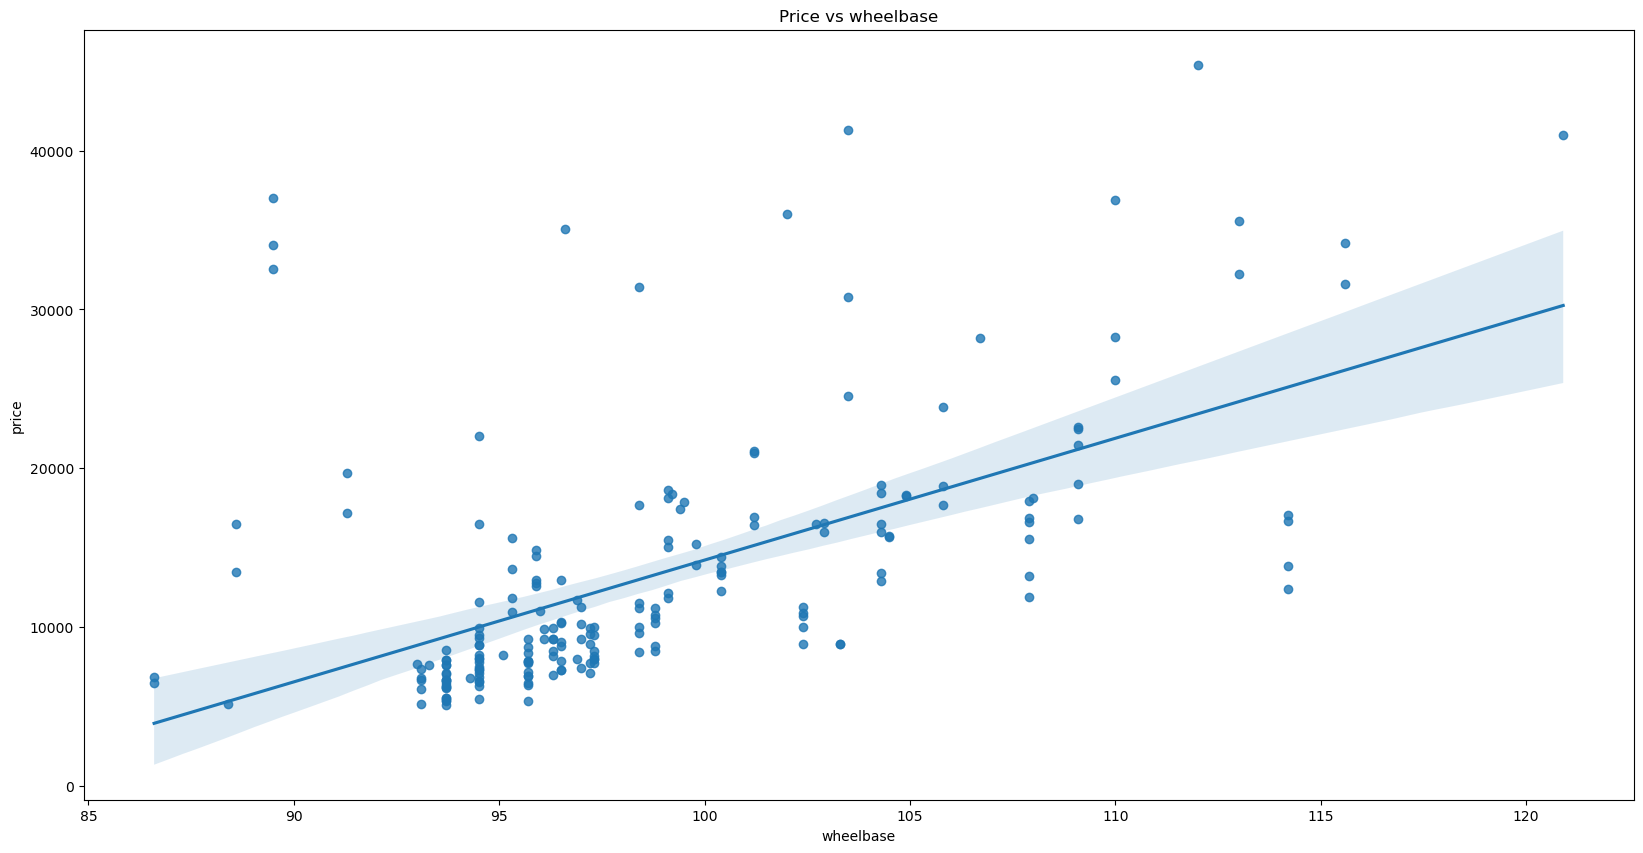

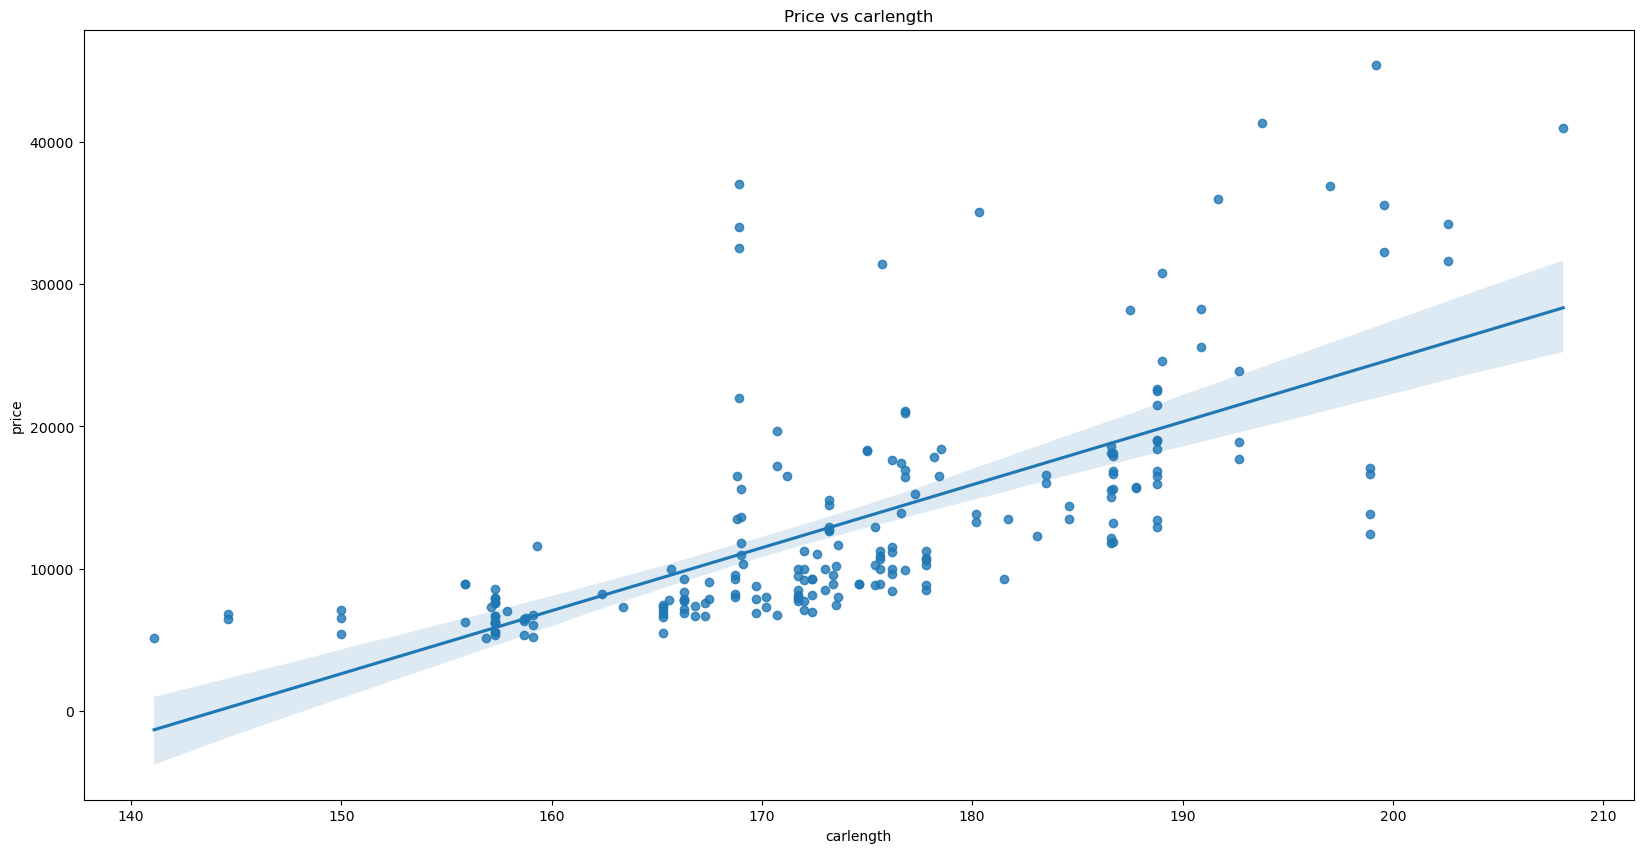

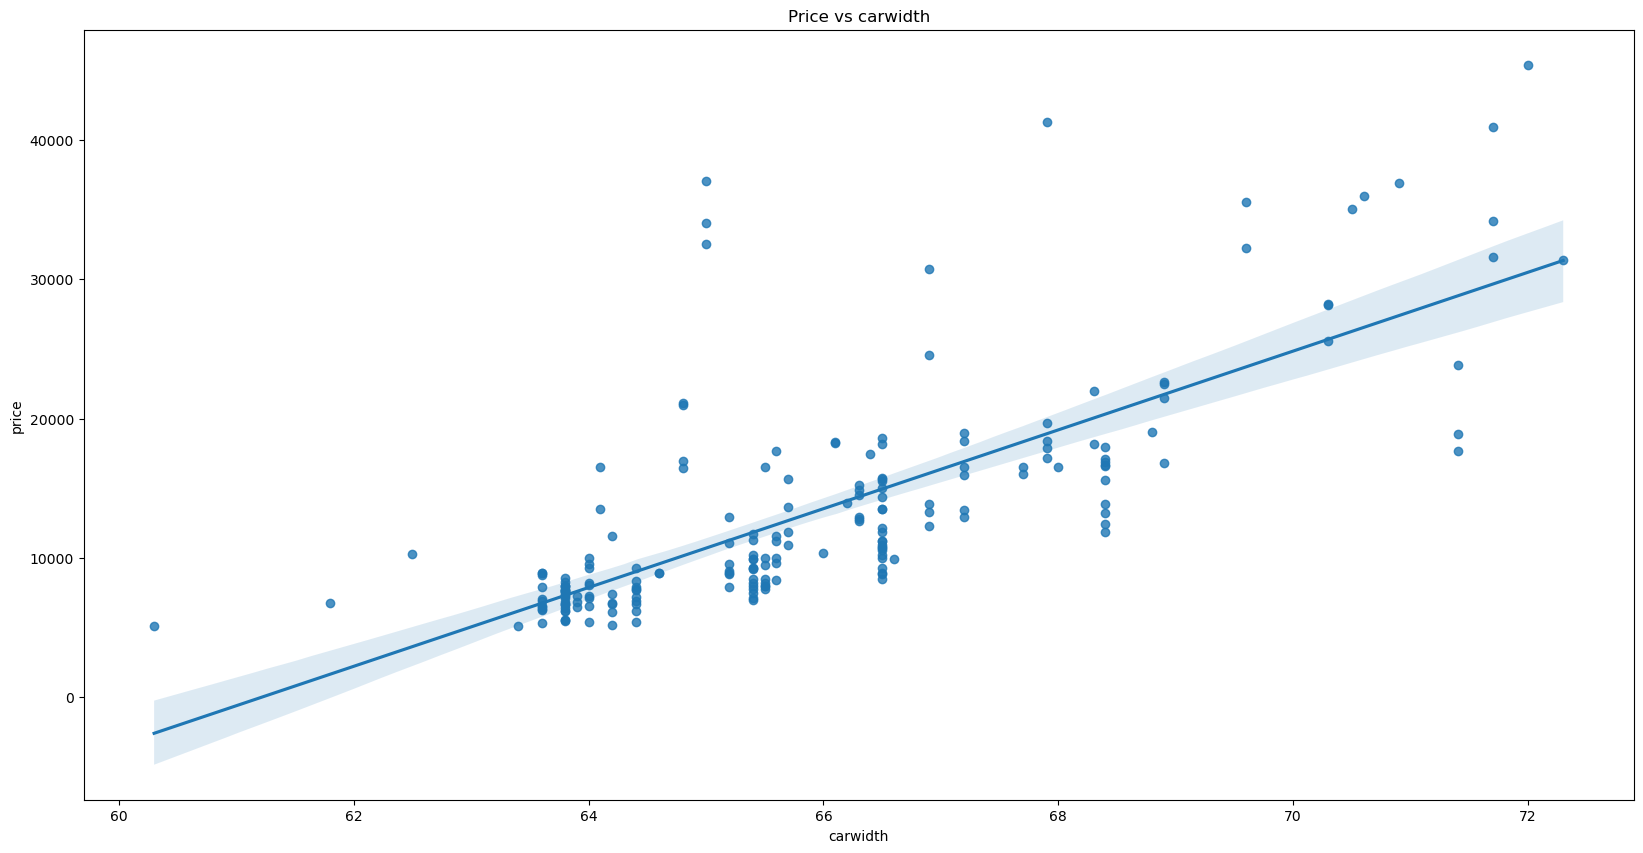

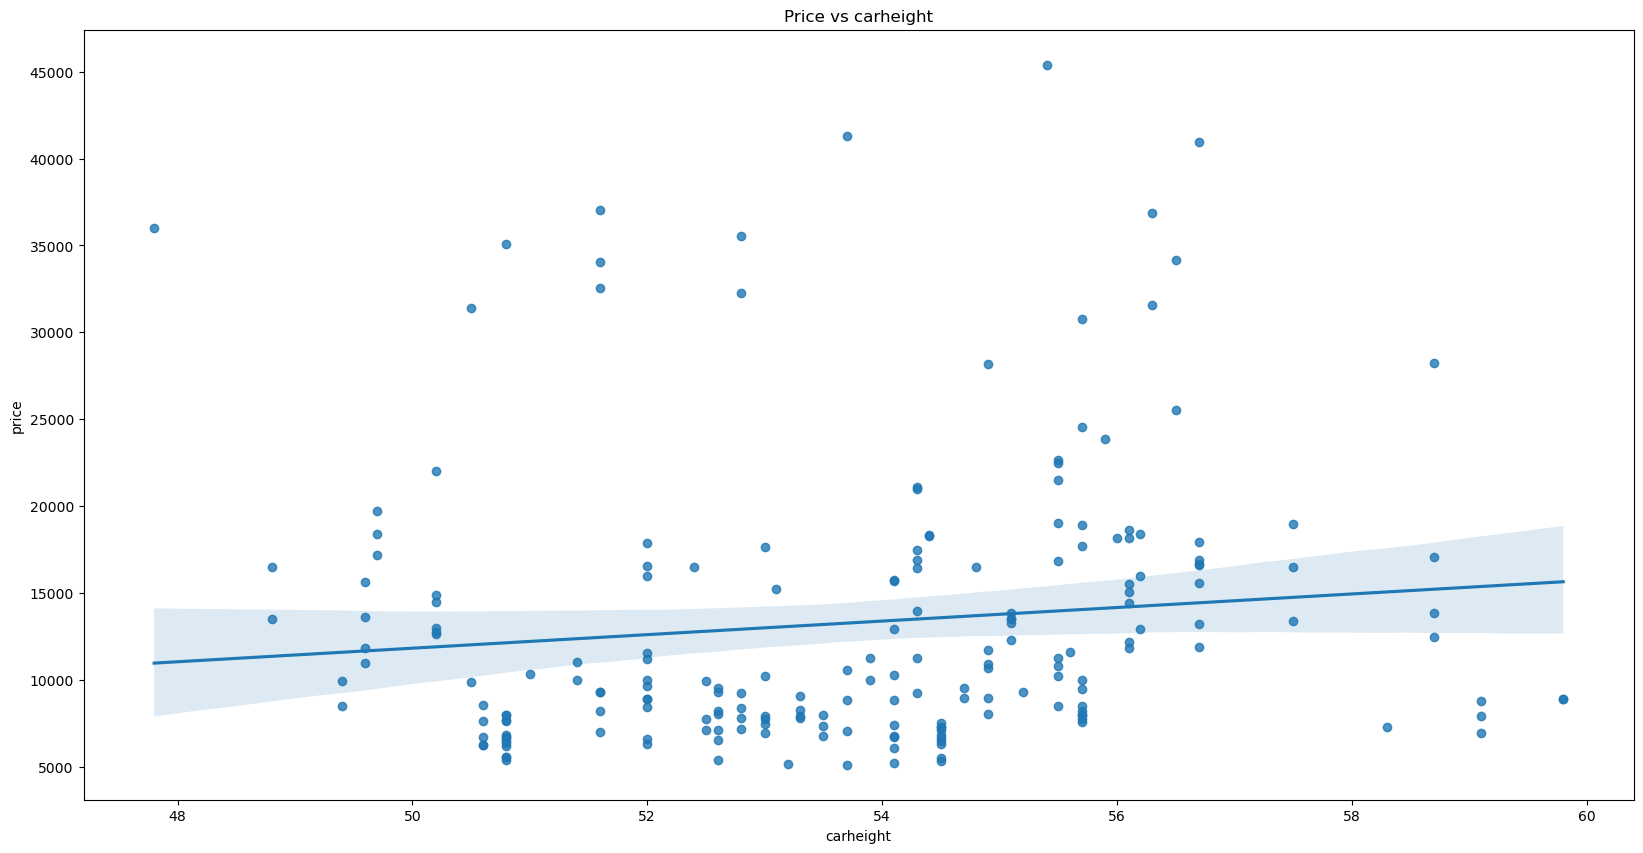

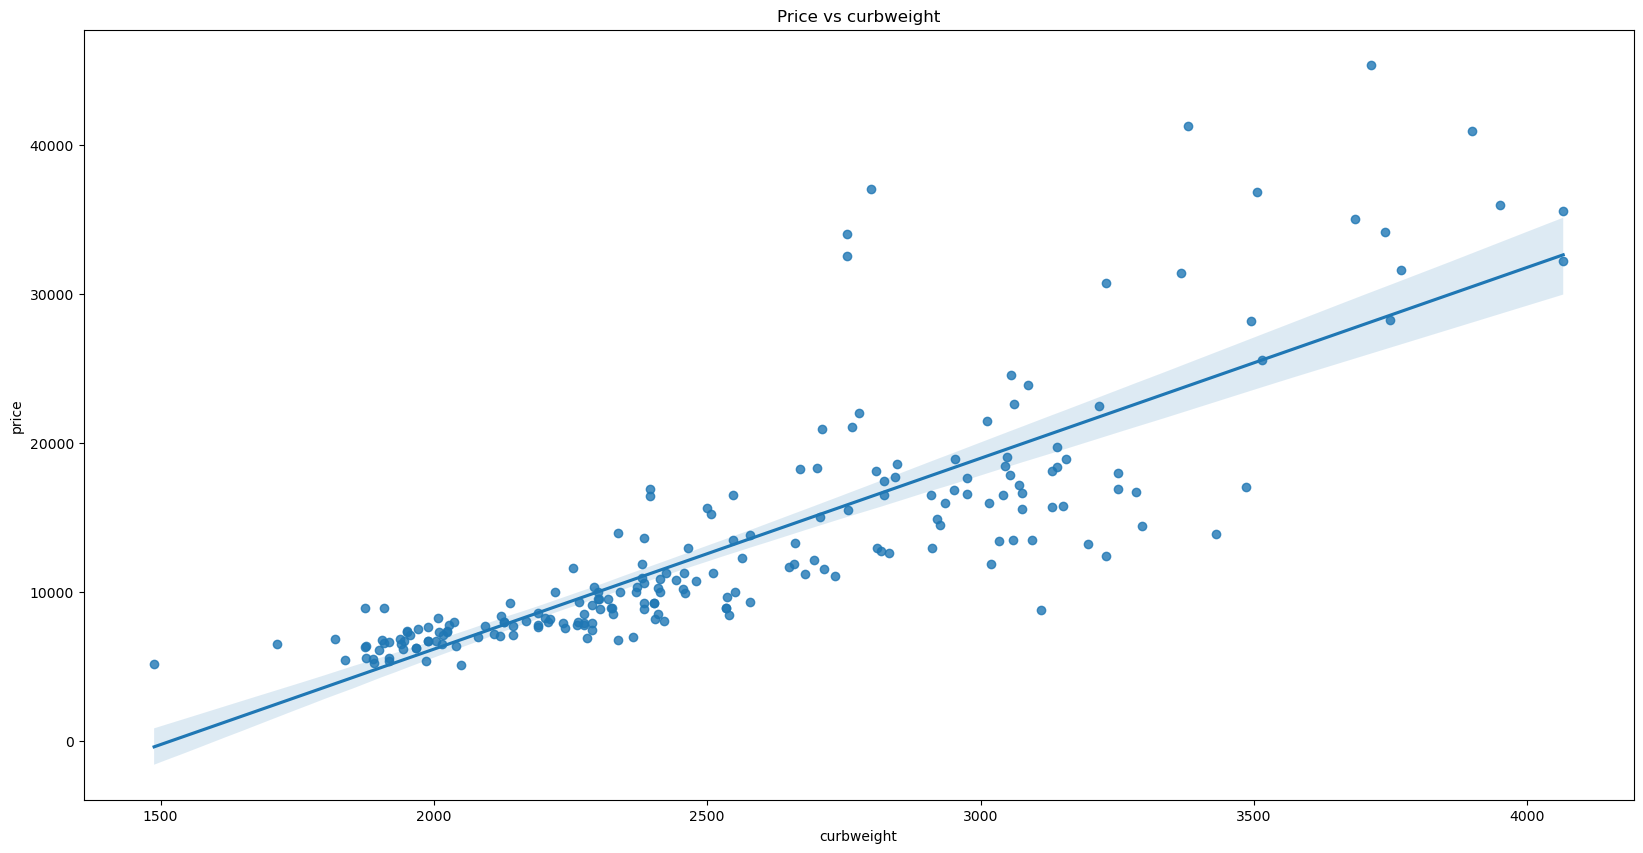

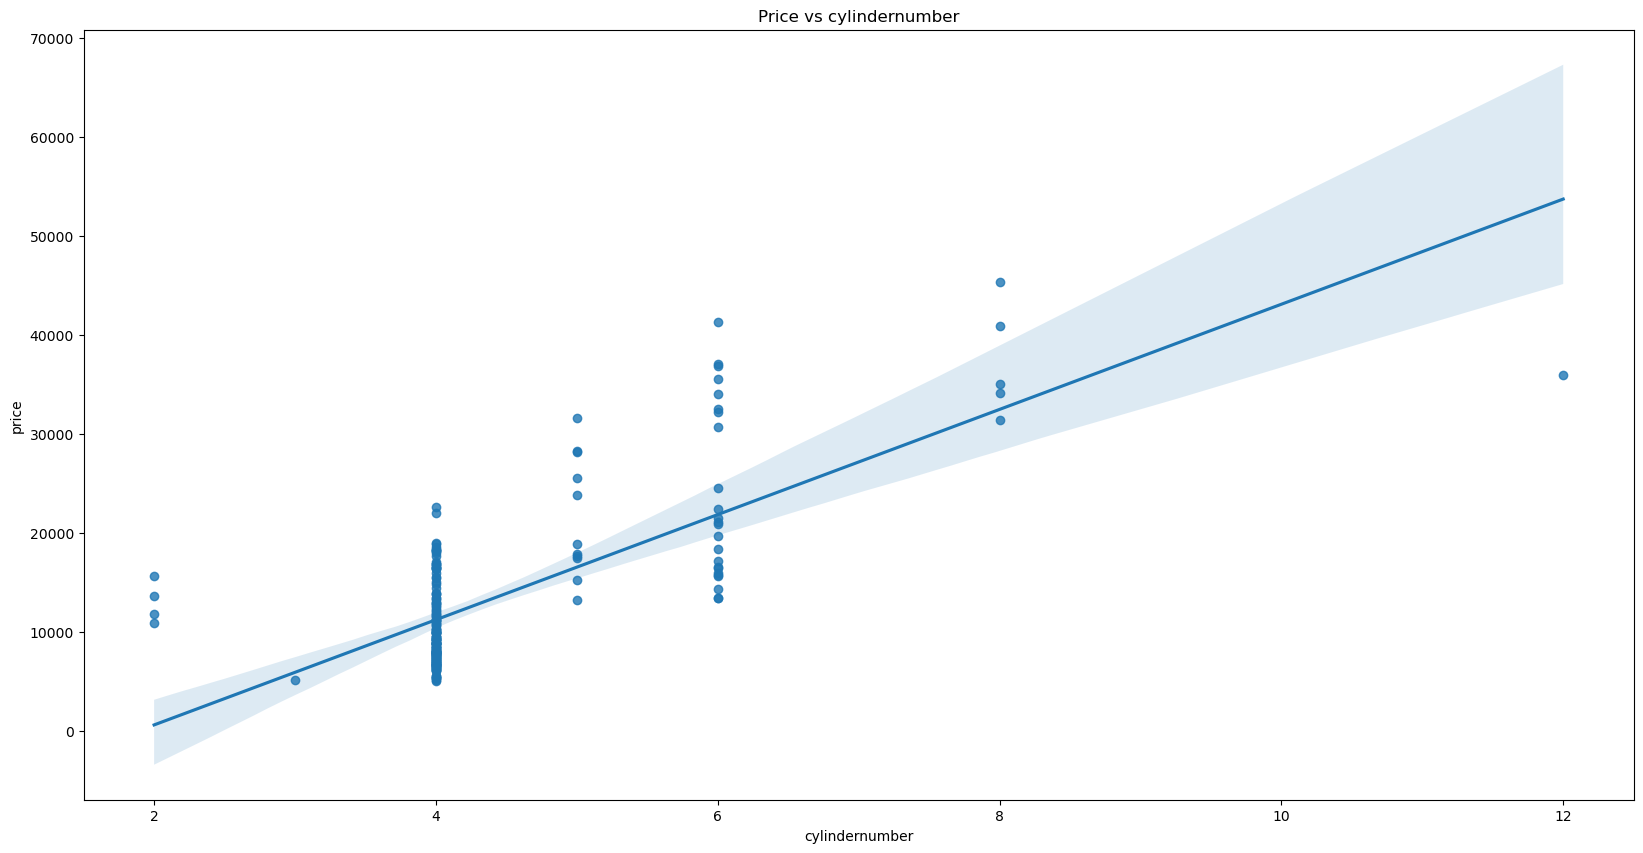

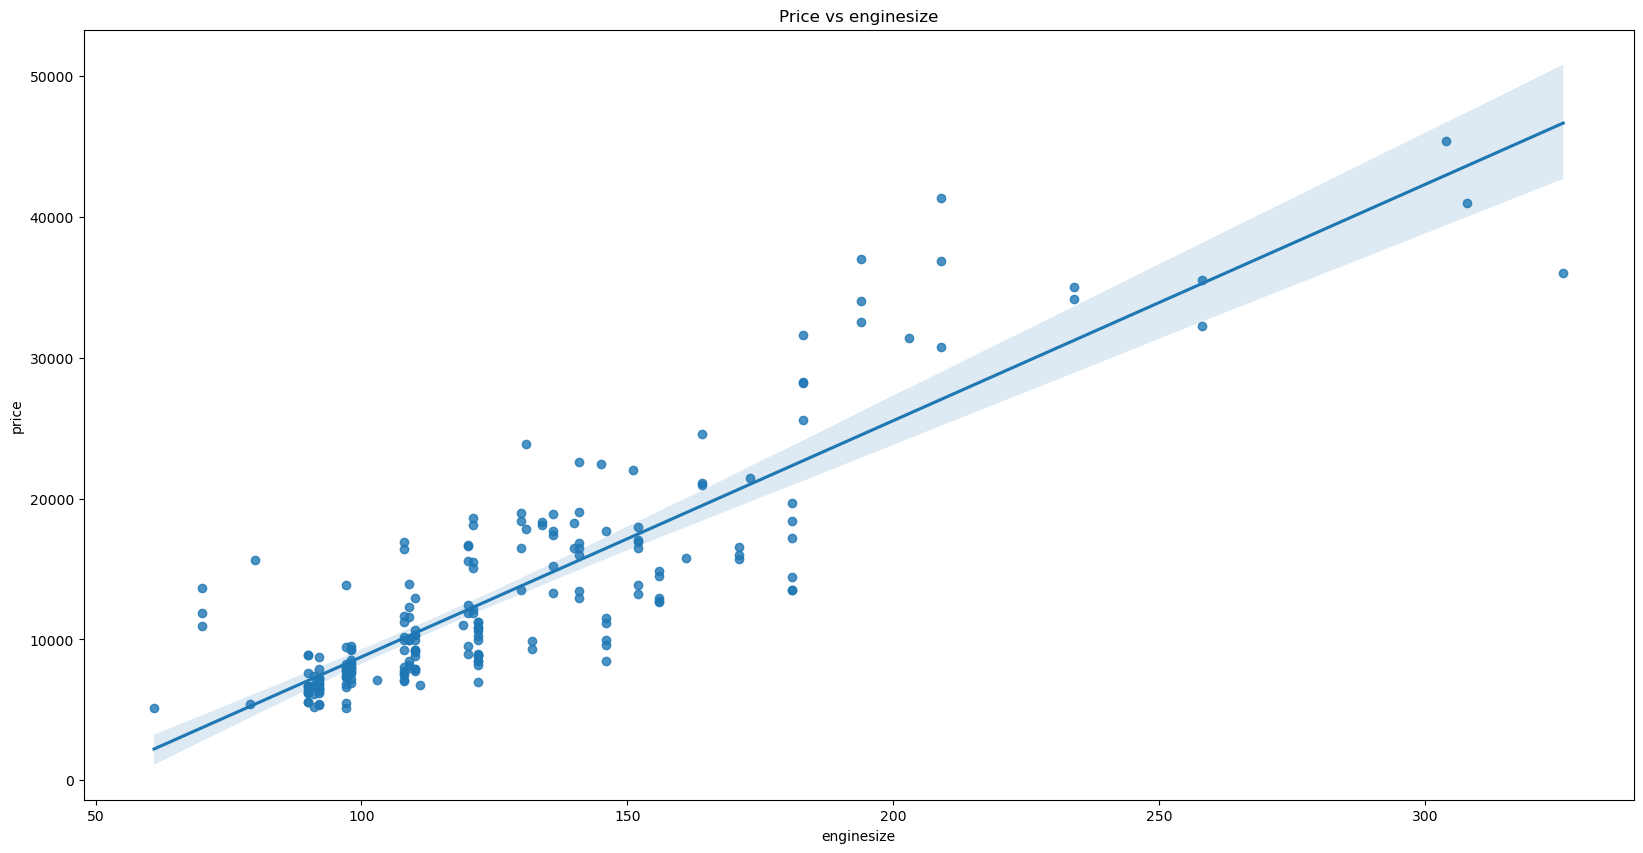

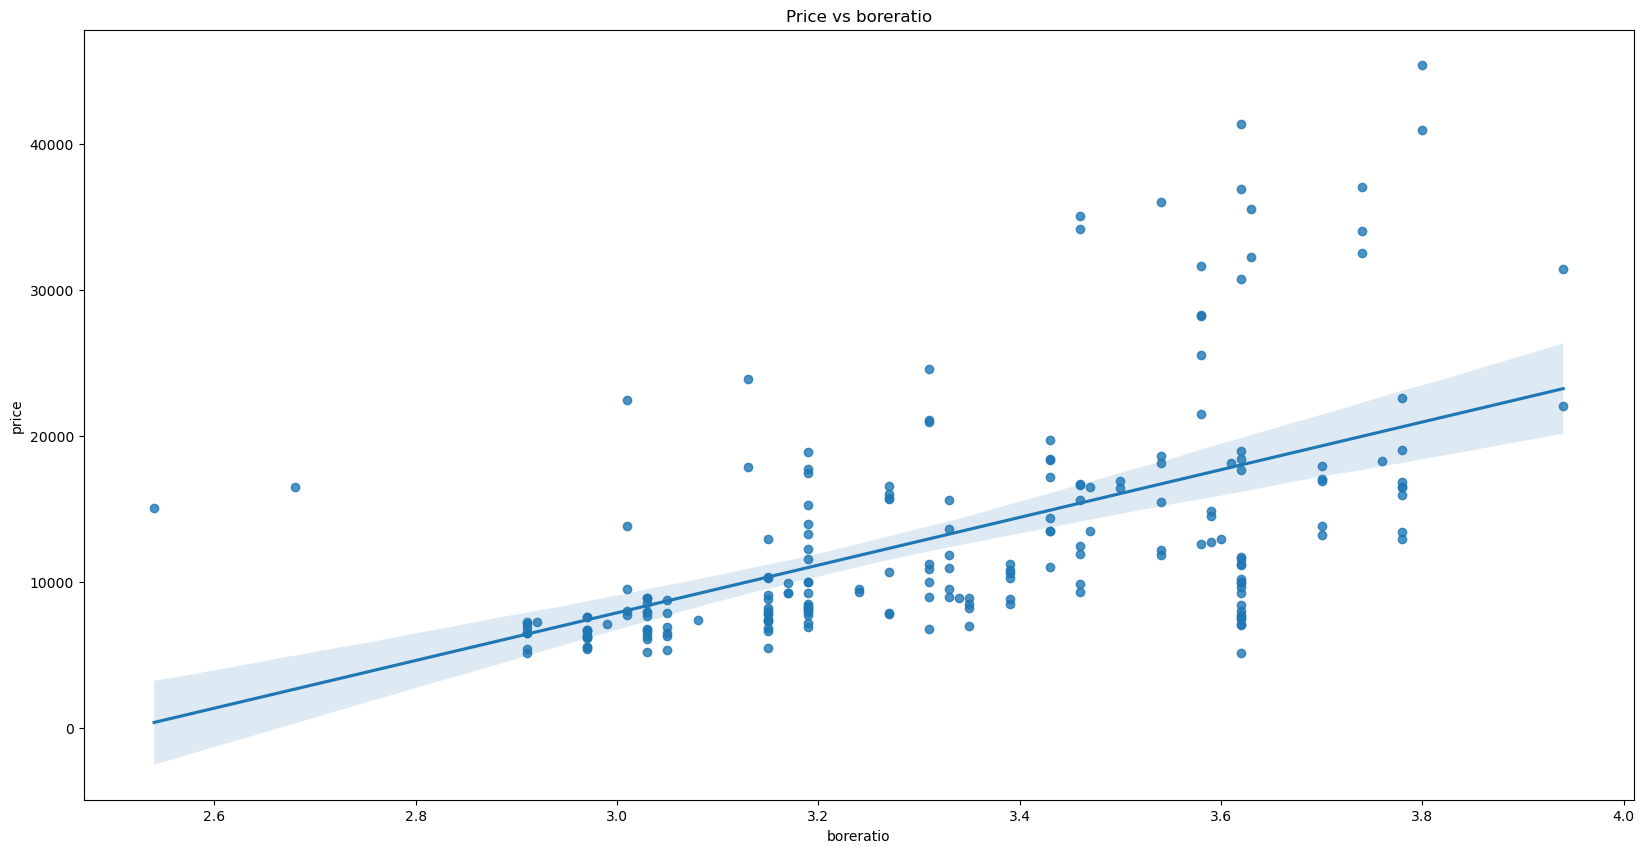

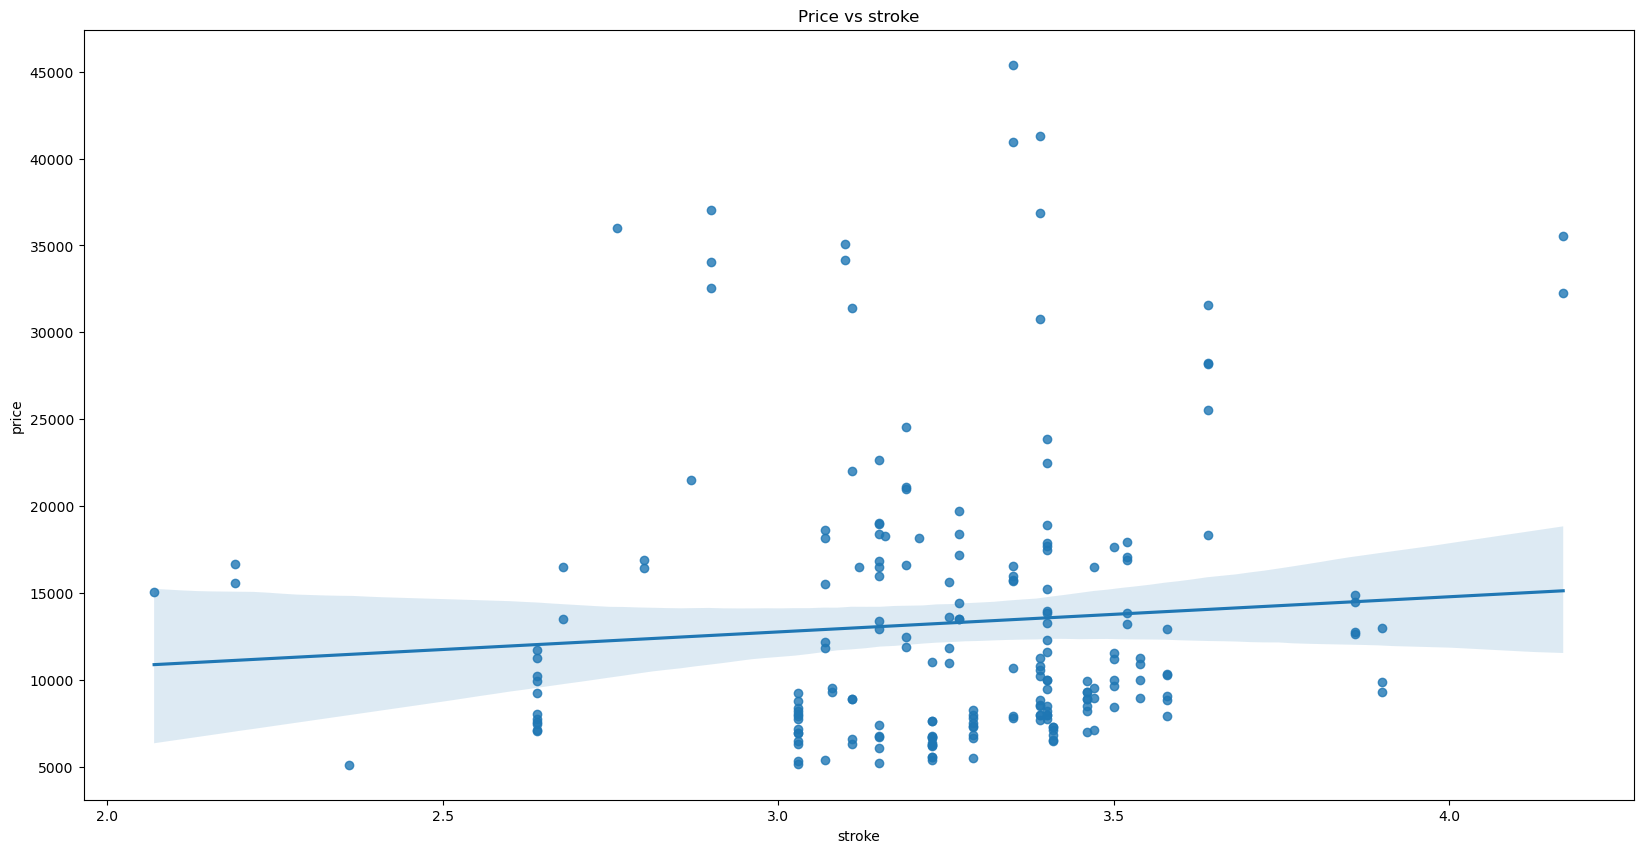

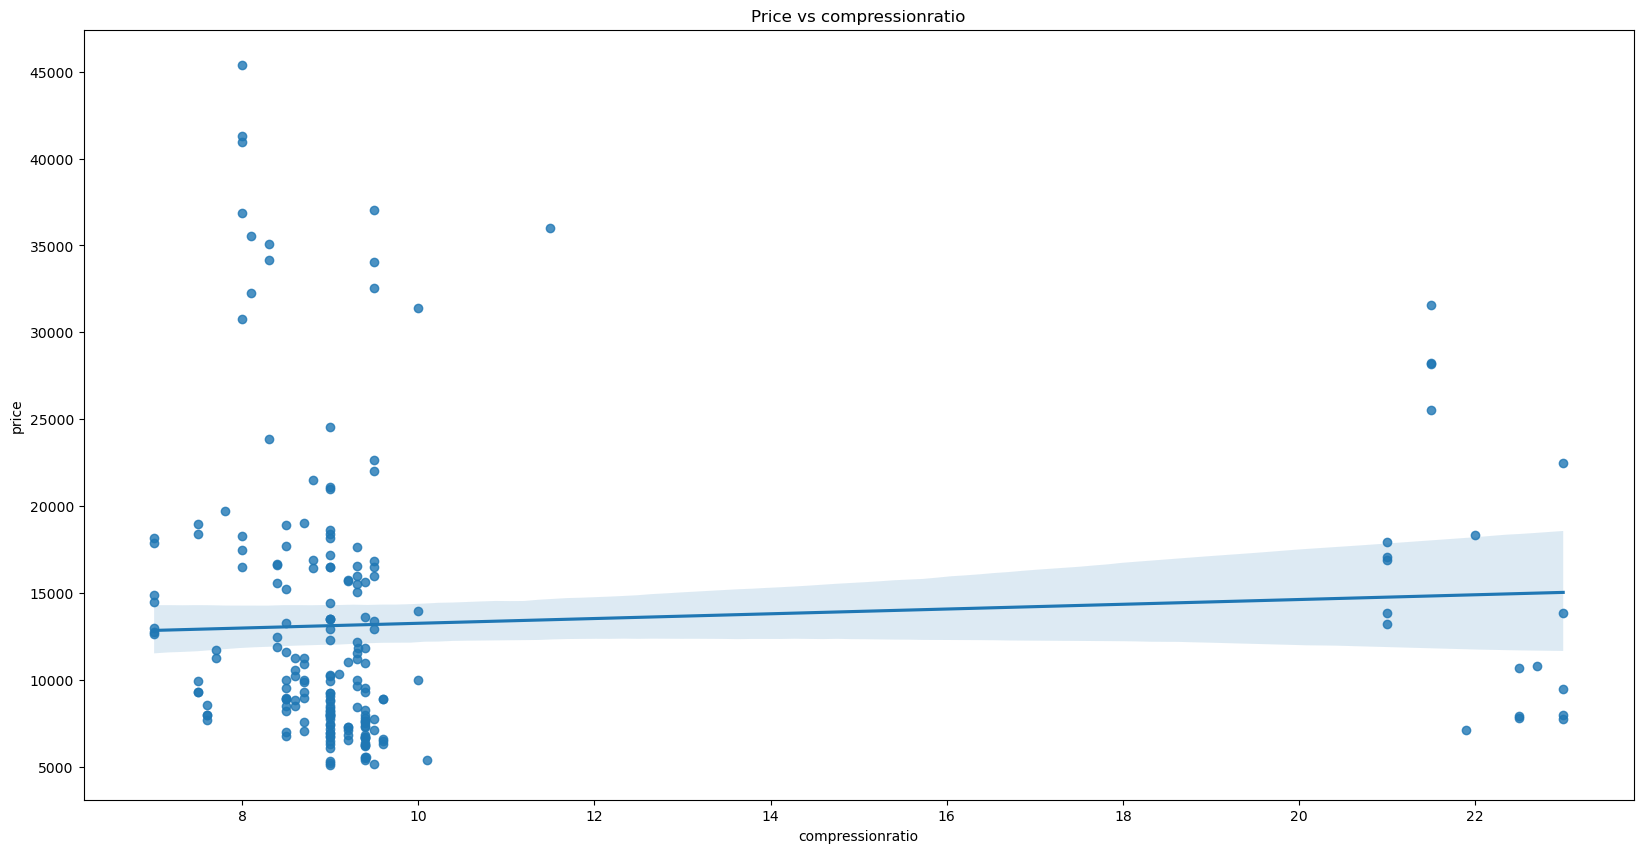

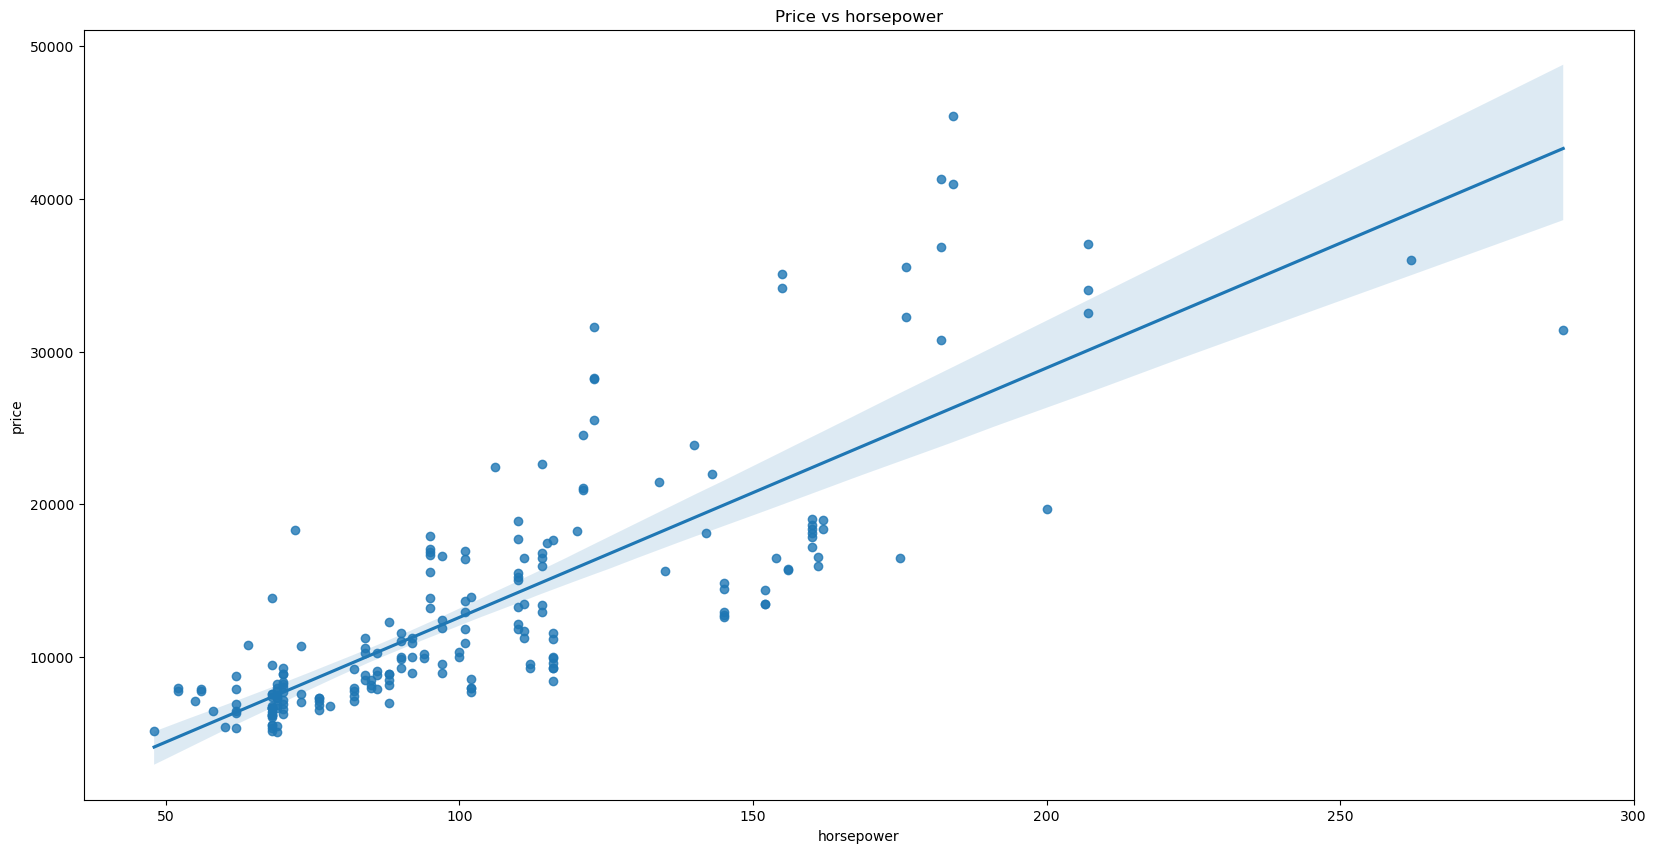

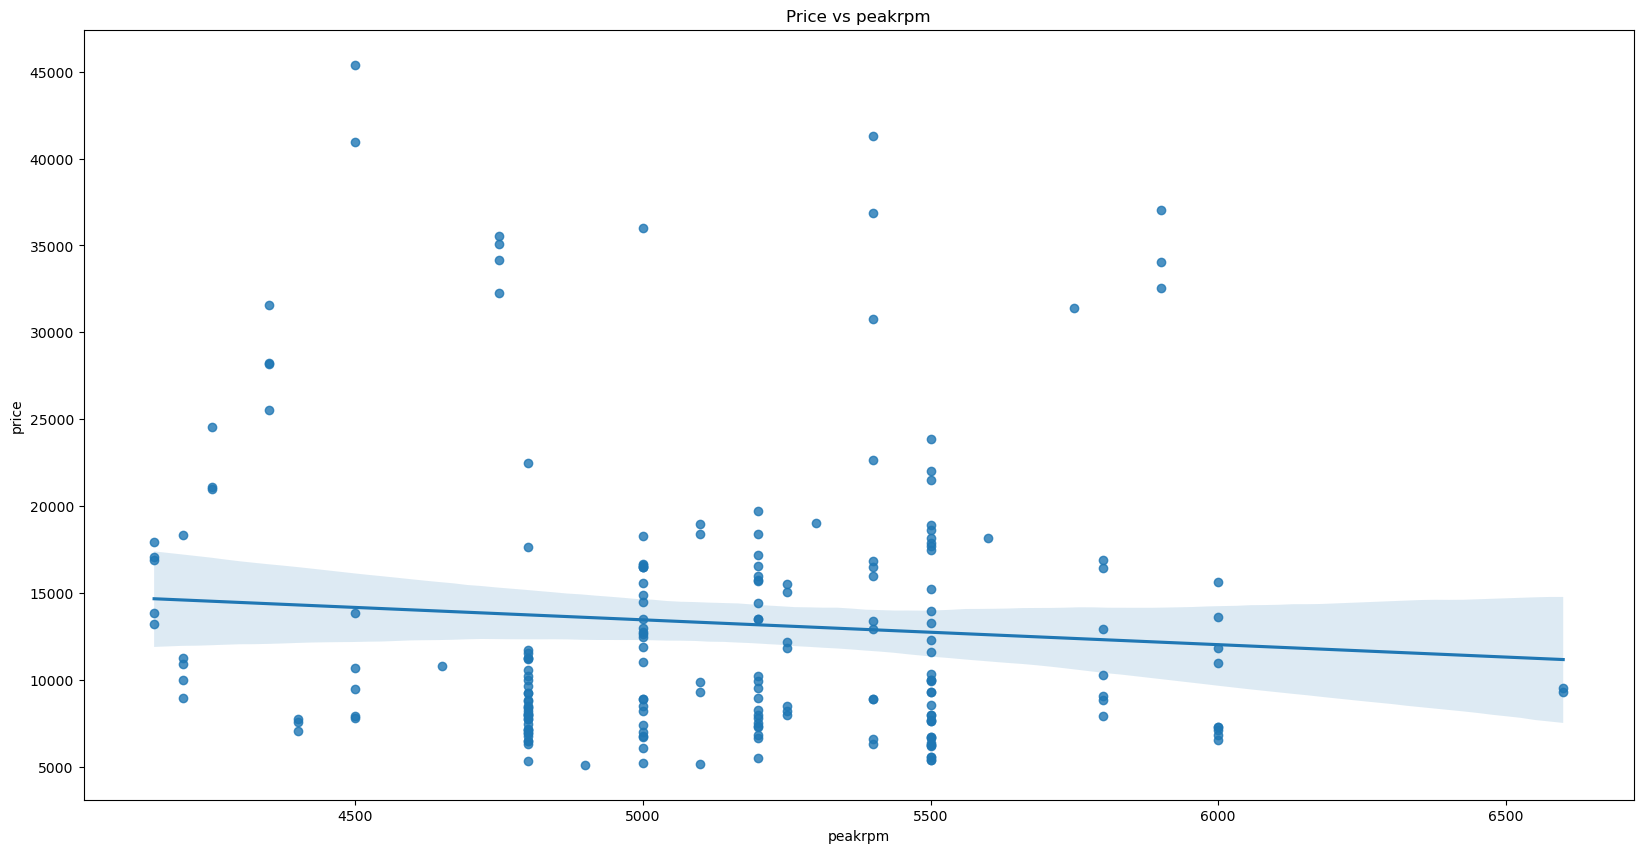

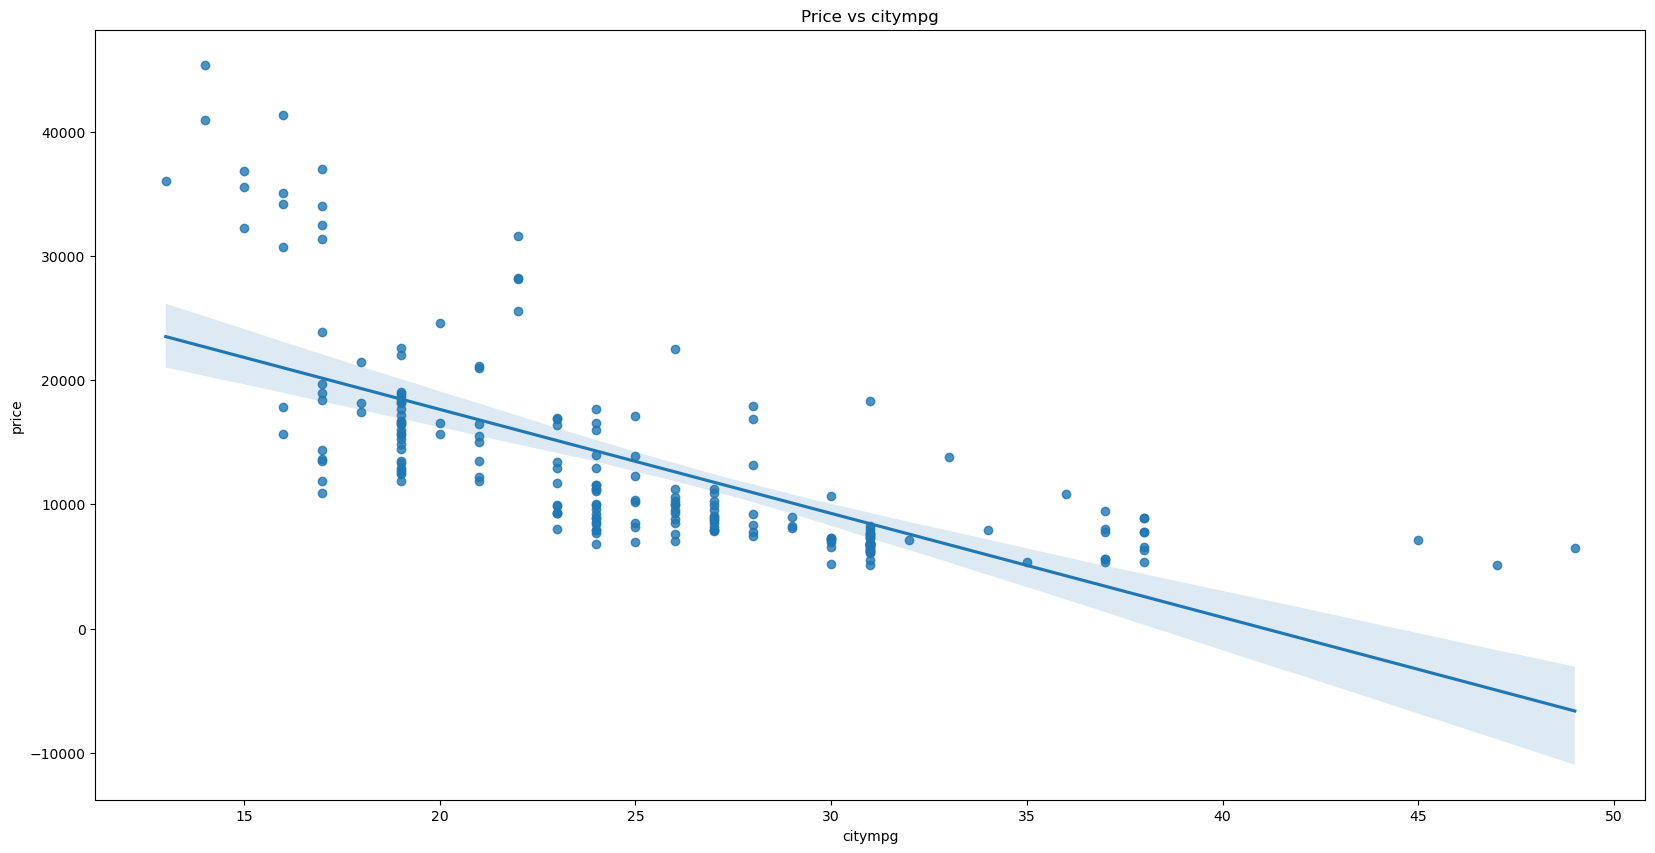

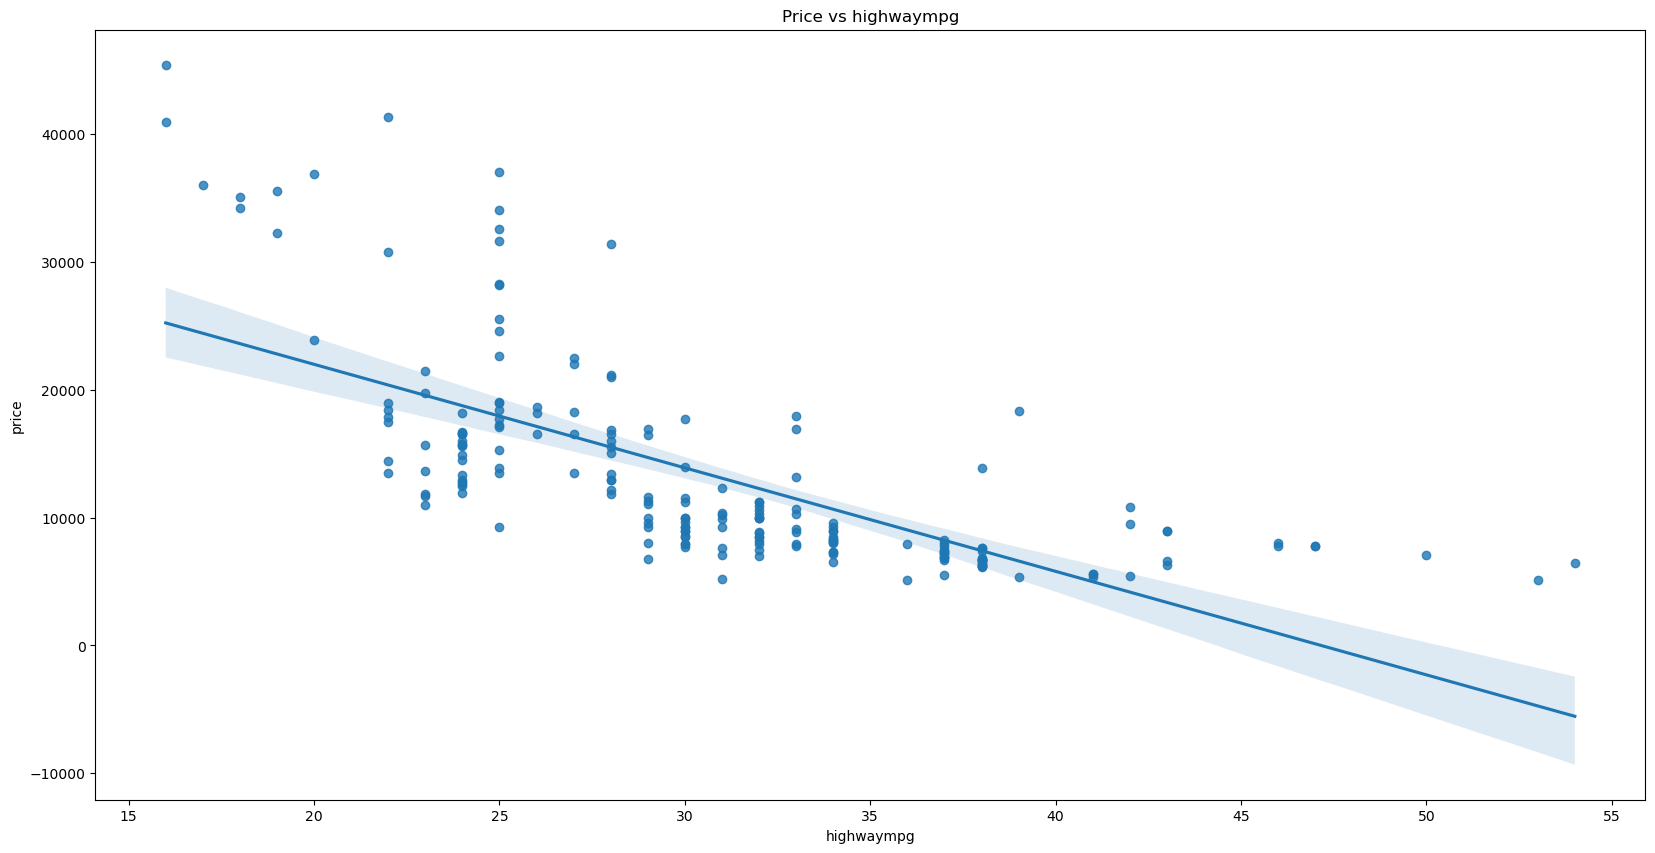

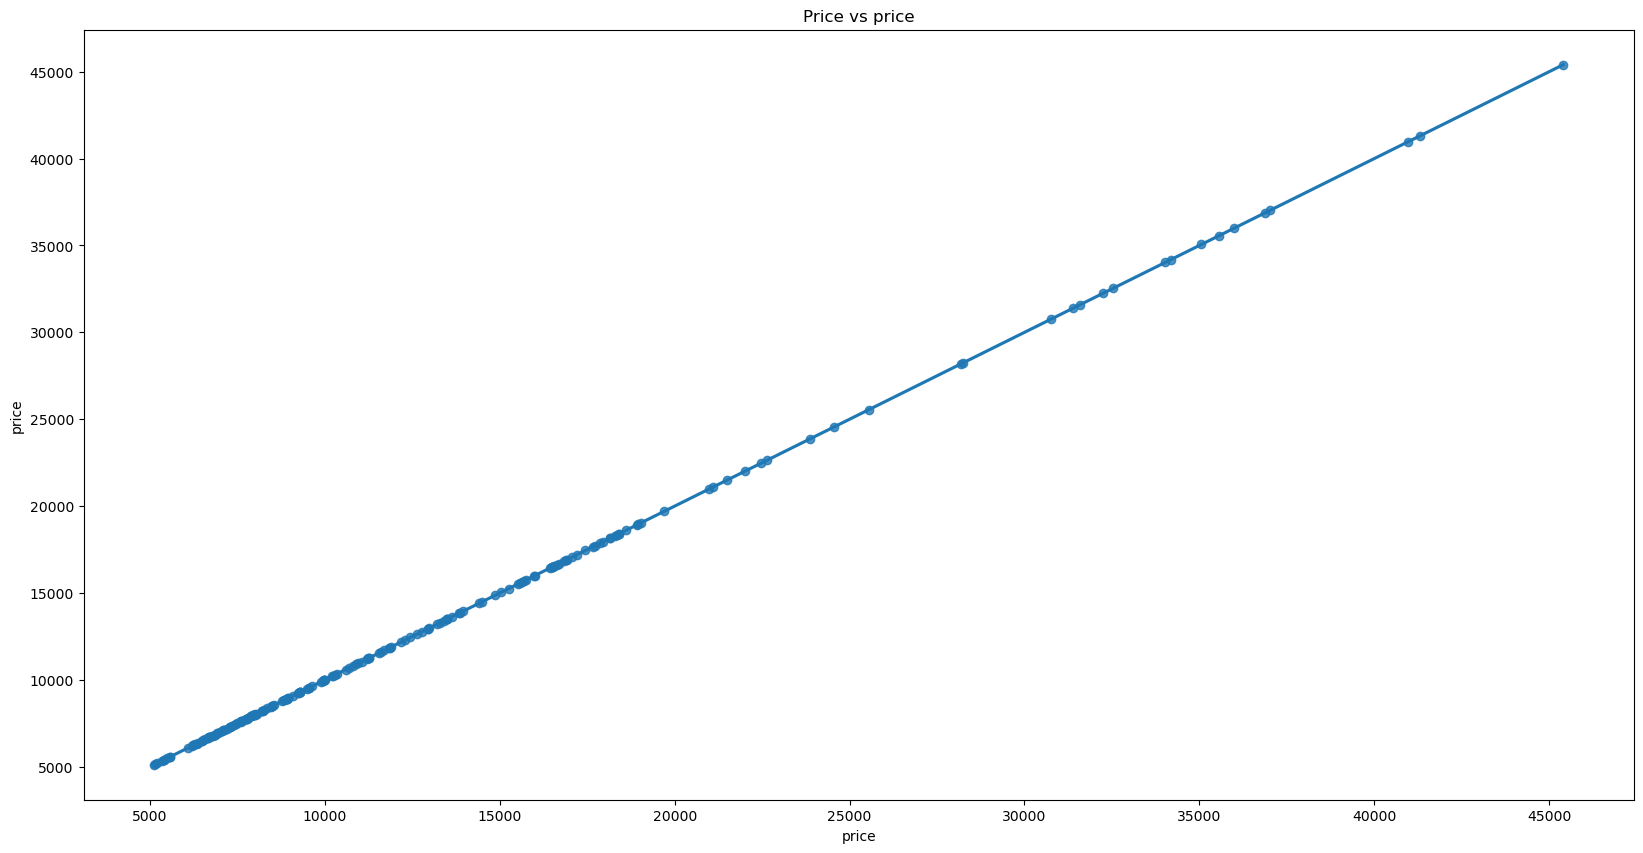

In [175]:
num_columns = df.select_dtypes(include=['int64', 'float64' ]).columns

for col in num_columns:
    plt.figure(figsize=(20,10))
    sns.regplot(data=df, y=df['price'], x=df[col])
    plt.title('Price vs ' + col)
    plt.show()

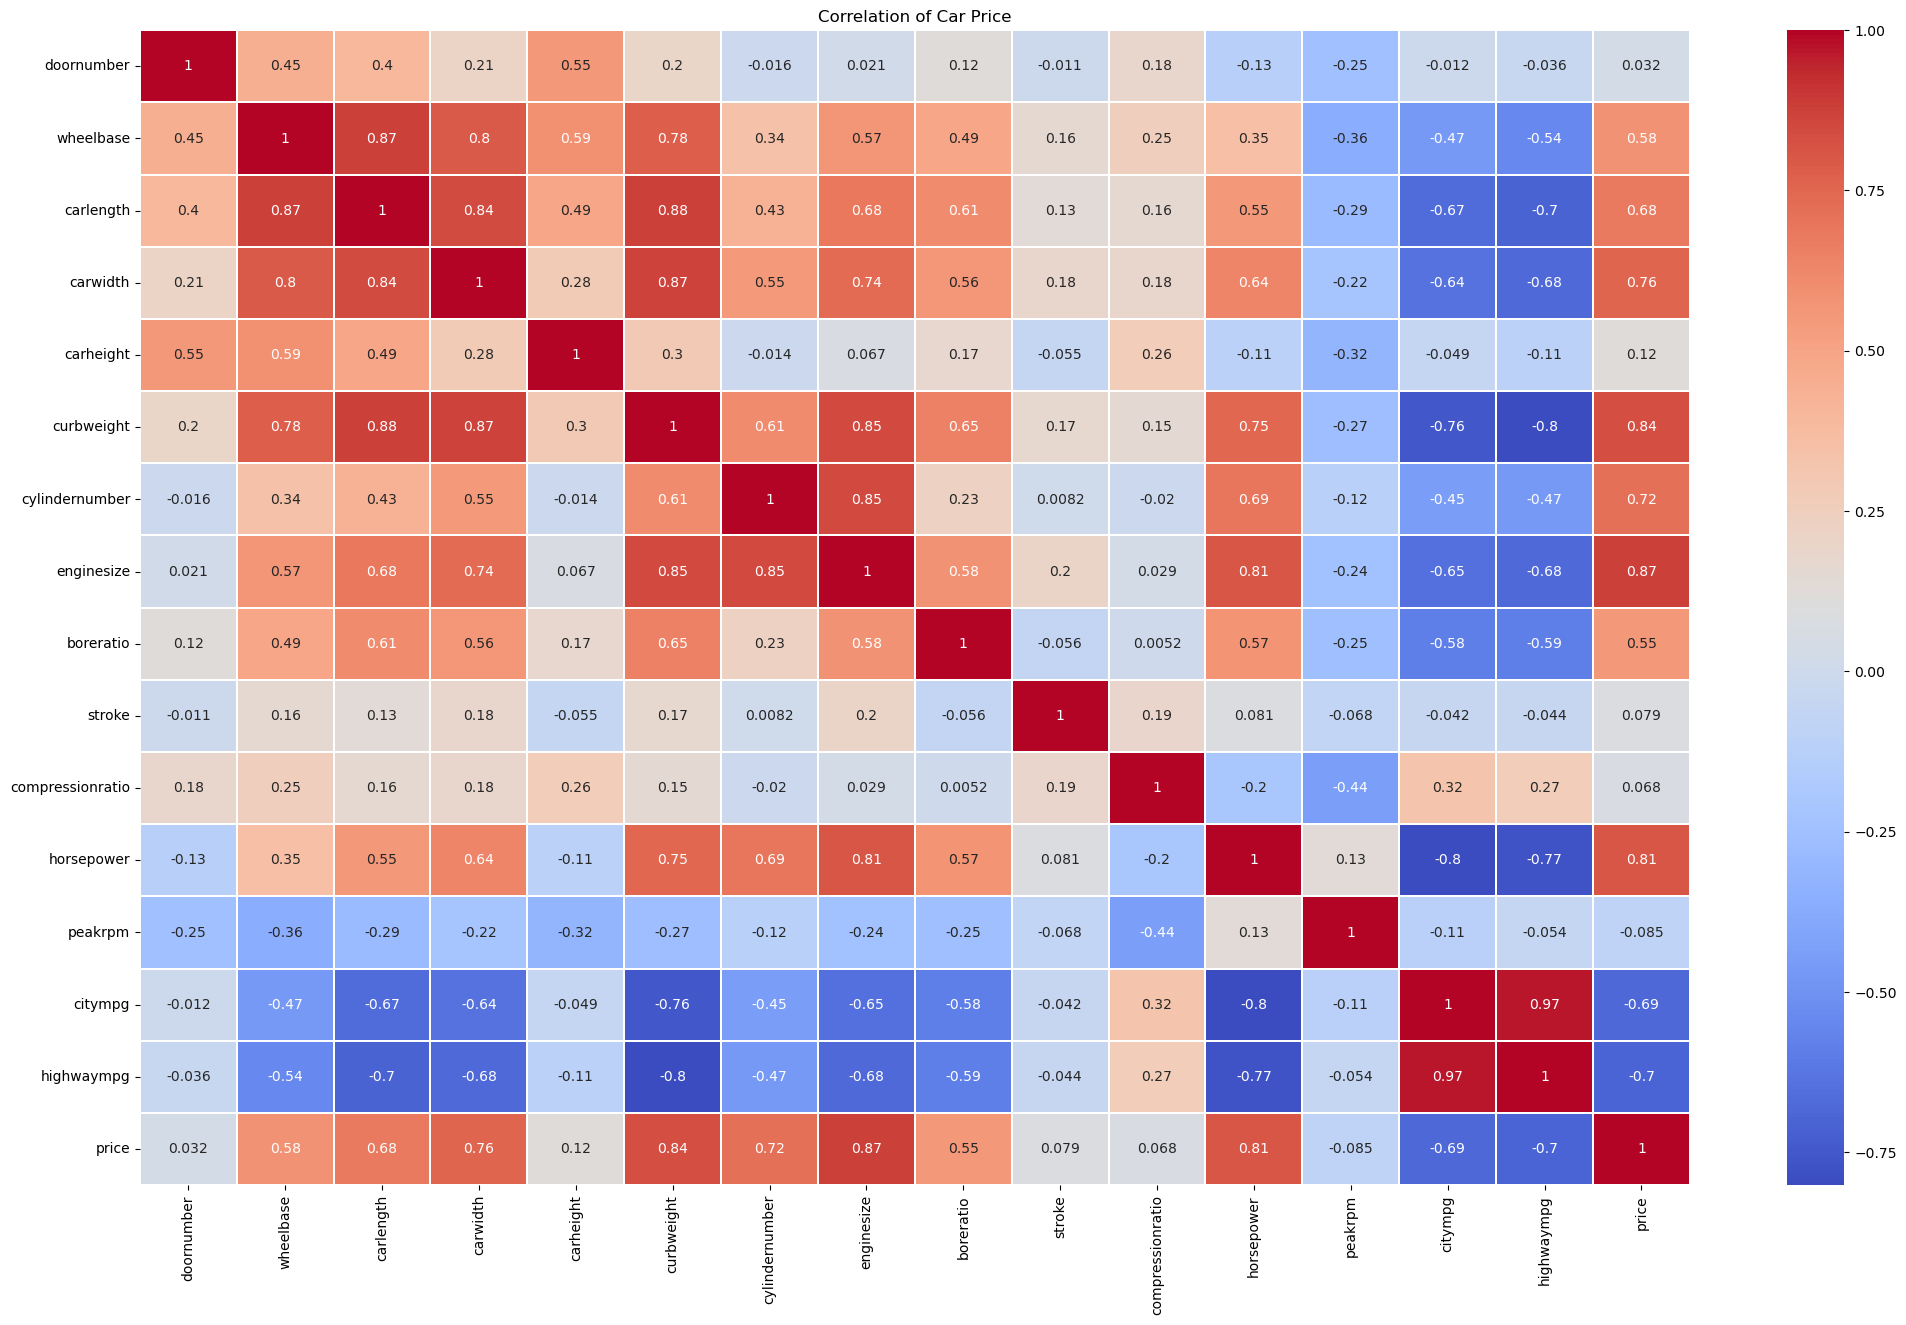

In [151]:
data_corr=df.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(25,15))
sns.heatmap(data_corr,annot=True,cmap='coolwarm', linewidths=0.01)
plt.title('Correlation of Car Price')
plt.show()

In [153]:
data_corr['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
cylindernumber      0.718305
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [181]:
final_columns = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'cylindernumber', 'carlength', 'wheelbase', 
                 'boreratio', 'citympg', 'highwaympg','fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 
                 'enginetype', 'price']
car_df = df[final_columns]
car_df.head()  

# Given that only a few variables are highly correlated its possible to reduce multicolinality manually

,enginesize,curbweight,horsepower,carwidth,cylindernumber,carlength,wheelbase,boreratio,citympg,highwaympg,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,price
0,130,2548,111,64.1,4,168.8,88.6,3.47,21,27,gas,std,convertible,rwd,front,dohc,13495.0
1,130,2548,111,64.1,4,168.8,88.6,3.47,21,27,gas,std,convertible,rwd,front,dohc,16500.0
2,152,2823,154,65.5,6,171.2,94.5,2.68,19,26,gas,std,hatchback,rwd,front,ohcv,16500.0
3,109,2337,102,66.2,4,176.6,99.8,3.19,24,30,gas,std,sedan,fwd,front,ohc,13950.0
4,136,2824,115,66.4,5,176.6,99.4,3.19,18,22,gas,std,sedan,4wd,front,ohc,17450.0


In [183]:
car_df = pd.get_dummies(car_df, columns=['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 
                 'enginetype'], drop_first=True, dtype='int64')
car_df.head()

,enginesize,curbweight,horsepower,carwidth,cylindernumber,carlength,wheelbase,boreratio,citympg,highwaympg,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,130,2548,111,64.1,4,168.8,88.6,3.47,21,27,...,0,0,1,0,0,0,0,0,0,0
1,130,2548,111,64.1,4,168.8,88.6,3.47,21,27,...,0,0,1,0,0,0,0,0,0,0
2,152,2823,154,65.5,6,171.2,94.5,2.68,19,26,...,0,0,1,0,0,0,0,0,1,0
3,109,2337,102,66.2,4,176.6,99.8,3.19,24,30,...,0,1,0,0,0,0,1,0,0,0
4,136,2824,115,66.4,5,176.6,99.4,3.19,18,22,...,0,0,0,0,0,0,1,0,0,0


In [90]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   doornumber           205 non-null    int64  
 1   wheelbase            205 non-null    float64
 2   carlength            205 non-null    float64
 3   carwidth             205 non-null    float64
 4   carheight            205 non-null    float64
 5   curbweight           205 non-null    int64  
 6   cylindernumber       205 non-null    int64  
 7   enginesize           205 non-null    int64  
 8   boreratio            205 non-null    float64
 9   stroke               205 non-null    float64
 10  compressionratio     205 non-null    float64
 11  horsepower           205 non-null    int64  
 12  peakrpm              205 non-null    int64  
 13  citympg              205 non-null    int64  
 14  highwaympg           205 non-null    int64  
 15  price                205 non-null    flo

In [187]:
x = car_df.drop(['price'], axis=1)
y = car_df[['price']]

In [242]:
x.head()

,enginesize,curbweight,horsepower,carwidth,cylindernumber,carlength,wheelbase,boreratio,citympg,highwaympg,...,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,130,2548,111,64.1,4,168.8,88.6,3.47,21,27,...,0,0,1,0,0,0,0,0,0,0
1,130,2548,111,64.1,4,168.8,88.6,3.47,21,27,...,0,0,1,0,0,0,0,0,0,0
2,152,2823,154,65.5,6,171.2,94.5,2.68,19,26,...,0,0,1,0,0,0,0,0,1,0
3,109,2337,102,66.2,4,176.6,99.8,3.19,24,30,...,0,1,0,0,0,0,1,0,0,0
4,136,2824,115,66.4,5,176.6,99.4,3.19,18,22,...,0,0,0,0,0,0,1,0,0,0


In [191]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, random_state=42, test_size=0.2)

# Print the shape of the splits
print(f"Train features shape: {x_train.shape}")
print(f"Test features shape: {x_test.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Train features shape: (164, 25)
Test features shape: (41, 25)
Train labels shape: (164, 1)
Test labels shape: (41, 1)


In [195]:
scale = StandardScaler()

x_train_sc = scale.fit_transform(x_train)
x_test_sc = scale.fit_transform(x_test)

In [197]:
def error_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred):
    
    errors = {}
    
    # Errors for train data
    errors["Train_MAE"] = mean_absolute_error(y_train_true, y_train_pred)
    errors["Train_MSE"] = mean_squared_error(y_train_true, y_train_pred)
    errors["Train_RMSE"] = np.sqrt(errors["Train_MSE"])
    errors["Train_R2_Score"] = r2_score(y_train_true, y_train_pred)
    
    # Errors for test data
    errors["Test_MAE"] = mean_absolute_error(y_test_true, y_test_pred)
    errors["Test_MSE"] = mean_squared_error(y_test_true, y_test_pred)
    errors["Test_RMSE"] = np.sqrt(errors["Test_MSE"])
    errors["Test_R2_Score"] = r2_score(y_test_true, y_test_pred)
    
    return errors

model_evaluation = []

In [199]:
lr = LinearRegression()

lr.fit(x_train_sc, y_train)

y_train_pred = lr.predict(x_train_sc)
y_test_pred = lr.predict(x_test_sc)

error_lr = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_lr

{'Train_MAE': 1590.713222207651,
 'Train_MSE': 4795967.326218939,
 'Train_RMSE': 2189.9697089729207,
 'Train_R2_Score': 0.9195818034920166,
 'Test_MAE': 2510.6413725740226,
 'Test_MSE': 17626555.23252179,
 'Test_RMSE': 4198.399127348636,
 'Test_R2_Score': 0.7767208328621653}

In [201]:
error_lr['Model Name']='Linear Regression'
error_lr
model_evaluation = (pd.DataFrame([error_lr]))
model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,1590.713222,4.795967e+06,2189.969709,0.919582,2510.641373,1.762656e+07,4198.399127,0.776721,Linear Regression


In [203]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('model', Lasso())
])
pipe

param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'poly__degree': [1, 2, 3, 4]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(best_model)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('model', Lasso(alpha=100))])


In [204]:
lasso = Lasso(alpha=100)

lasso.fit(x_train_sc, y_train)

y_train_pred = lasso.predict(x_train_sc)
y_test_pred = lasso.predict(x_test_sc)

error_lasso = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_lasso['Model Name'] = 'Lasso'
error_lasso

{'Train_MAE': 1775.23077811614,
 'Train_MSE': 5593338.151792767,
 'Train_RMSE': 2365.023922033933,
 'Train_R2_Score': 0.906211586520317,
 'Test_MAE': 2575.563770212291,
 'Test_MSE': 16849508.179770656,
 'Test_RMSE': 4104.8152430737555,
 'Test_R2_Score': 0.7865638462290125,
 'Model Name': 'Lasso'}

In [205]:
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_lasso]))], ignore_index=True)
model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,1590.713222,4.795967e+06,2189.969709,0.919582,2510.641373,1.762656e+07,4198.399127,0.776721,Linear Regression
1,1775.230778,5.593338e+06,2365.023922,0.906212,2575.563770,1.684951e+07,4104.815243,0.786564,Lasso


In [206]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
])
pipe

param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'poly__degree': [1, 2, 3, 4]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best model
best_model_ridge = grid_search.best_estimator_
print(best_model_ridge)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('model', Ridge(alpha=10))])


In [207]:
best_model_ridge.fit(x_train, y_train)

y_train_pred = best_model_ridge.predict(x_train)
y_test_pred = best_model_ridge.predict(x_test)

error_ridge = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_ridge['Model Name'] = 'Ridge'
error_ridge

{'Train_MAE': 1677.0990513522447,
 'Train_MSE': 5191984.450606108,
 'Train_RMSE': 2278.592646921803,
 'Train_R2_Score': 0.9129414365413515,
 'Test_MAE': 2526.938540693514,
 'Test_MSE': 15678638.92831598,
 'Test_RMSE': 3959.626109661868,
 'Test_R2_Score': 0.8013954856414458,
 'Model Name': 'Ridge'}

In [208]:
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_ridge]))], ignore_index=True)
model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,1590.713222,4.795967e+06,2189.969709,0.919582,2510.641373,1.762656e+07,4198.399127,0.776721,Linear Regression
1,1775.230778,5.593338e+06,2365.023922,0.906212,2575.563770,1.684951e+07,4104.815243,0.786564,Lasso
2,1677.099051,5.191984e+06,2278.592647,0.912941,2526.938541,1.567864e+07,3959.626110,0.801395,Ridge


In [209]:
mod_tree = DecisionTreeRegressor(random_state=42)

param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': np.arange(1,10),
    
}

grid_search = GridSearchCV(mod_tree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model
best_tree = grid_search.best_estimator_
print(best_tree)

DecisionTreeRegressor(criterion='poisson', max_depth=6, random_state=42)


In [217]:
best_tree.fit(x_train, y_train)

y_train_pred = best_tree.predict(x_train)
y_test_pred = best_tree.predict(x_test)

error_tree = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_tree['Model Name'] = 'Decision Tree'
error_tree

{'Train_MAE': 688.4693137824235,
 'Train_MSE': 1600610.1007379985,
 'Train_RMSE': 1265.1522045738207,
 'Train_R2_Score': 0.9731611646079977,
 'Test_MAE': 1995.5767599690284,
 'Test_MSE': 8298018.528590767,
 'Test_RMSE': 2880.6281482674517,
 'Test_R2_Score': 0.8948873082960865,
 'Model Name': 'Decision Tree'}

In [219]:
random_forest = RandomForestRegressor(random_state=42, n_estimators=100, criterion='squared_error', max_depth=6)

# param_grid = {
#     'n_estimators': [100, 200, 300, 400],
#     'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
#     'max_depth': np.arange(1,20),
#     'min_samples_split': np.arange(1,10)
# }

# grid_search = GridSearchCV(random_forest, param_grid, cv=5)
random_forest.fit(x_train, y_train)

# Get the best model
# best_forest = grid_search.best_estimator_
# print(best_forest)

RandomForestRegressor(max_depth=6, random_state=42)

In [221]:
y_train_pred = random_forest.predict(x_train)
y_test_pred = random_forest.predict(x_test)

error_random_forest = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_random_forest['Model Name'] = 'Random Forest'
error_random_forest

{'Train_MAE': 855.7121593997634,
 'Train_MSE': 1481595.9034878036,
 'Train_RMSE': 1217.2082416282776,
 'Train_R2_Score': 0.975156780184731,
 'Test_MAE': 1398.0775934274245,
 'Test_MSE': 3875460.433454685,
 'Test_RMSE': 1968.6189152435484,
 'Test_R2_Score': 0.9509087529331393,
 'Model Name': 'Random Forest'}

In [223]:
# Initialize XGBoost Regressor with parameters
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                          n_estimators=1000, 
                          learning_rate=0.01, 
                          max_depth=100, 
                          subsample=0.9, 
                          colsample_bytree=0.9, 
                          random_state=42,
                          reg_lambda=5
                         )

# Train the model
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=100, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [225]:
y_train_pred = xg_reg.predict(x_train)
y_test_pred = xg_reg.predict(x_test)

error_xg_reg = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_xg_reg['Model Name'] = 'XGBoost Regressor'
error_xg_reg

{'Train_MAE': 223.08628584698934,
 'Train_MSE': 280795.00721893803,
 'Train_RMSE': 529.9009409492854,
 'Train_R2_Score': 0.9952916634887095,
 'Test_MAE': 1522.531702362805,
 'Test_MSE': 5034079.167257898,
 'Test_RMSE': 2243.6753702926585,
 'Test_R2_Score': 0.9362322933242551,
 'Model Name': 'XGBoost Regressor'}

In [227]:
# Initialize GradientBoostingRegressor with some parameters
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, max_features='sqrt', subsample=0.8,
                               validation_fraction=0.1)

# Train the model
gbr.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=6, max_features='sqrt', random_state=42,
                          subsample=0.8)

In [229]:
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)

error_gbr = error_metrics(y_train, y_train_pred, y_test, y_test_pred)
error_gbr['Model Name'] = 'Gradient Boosting Regressor'
error_gbr

{'Train_MAE': 213.1152226606808,
 'Train_MSE': 125912.03859979169,
 'Train_RMSE': 354.84086376824143,
 'Train_R2_Score': 0.9978887222589105,
 'Test_MAE': 1222.4998404582605,
 'Test_MSE': 4307885.911476025,
 'Test_RMSE': 2075.5447264455725,
 'Test_R2_Score': 0.9454311312817095,
 'Model Name': 'Gradient Boosting Regressor'}

In [231]:
model_evaluation = pd.concat([model_evaluation, pd.DataFrame([error_tree]), pd.DataFrame([error_random_forest]), pd.DataFrame([error_xg_reg]),
                             pd.DataFrame([error_gbr])], 
                             ignore_index=True)
model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,1590.713222,4.795967e+06,2189.969709,0.919582,2510.641373,1.762656e+07,4198.399127,0.776721,Linear Regression
1,1775.230778,5.593338e+06,2365.023922,0.906212,2575.563770,1.684951e+07,4104.815243,0.786564,Lasso
2,1677.099051,5.191984e+06,2278.592647,0.912941,2526.938541,1.567864e+07,3959.626110,0.801395,Ridge
3,688.469314,1.600610e+06,1265.152205,0.973161,1995.576760,8.298019e+06,2880.628148,0.894887,Decision Tree
4,855.712159,1.481596e+06,1217.208242,0.975157,1398.077593,3.875460e+06,1968.618915,0.950909,Random Forest
5,223.086286,2.807950e+05,529.900941,0.995292,1522.531702,5.034079e+06,2243.675370,0.936232,XGBoost Regressor
6,213.115223,1.259120e+05,354.840864,0.997889,1222.499840,4.307886e+06,2075.544726,0.945431,Gradient Boosting Regressor


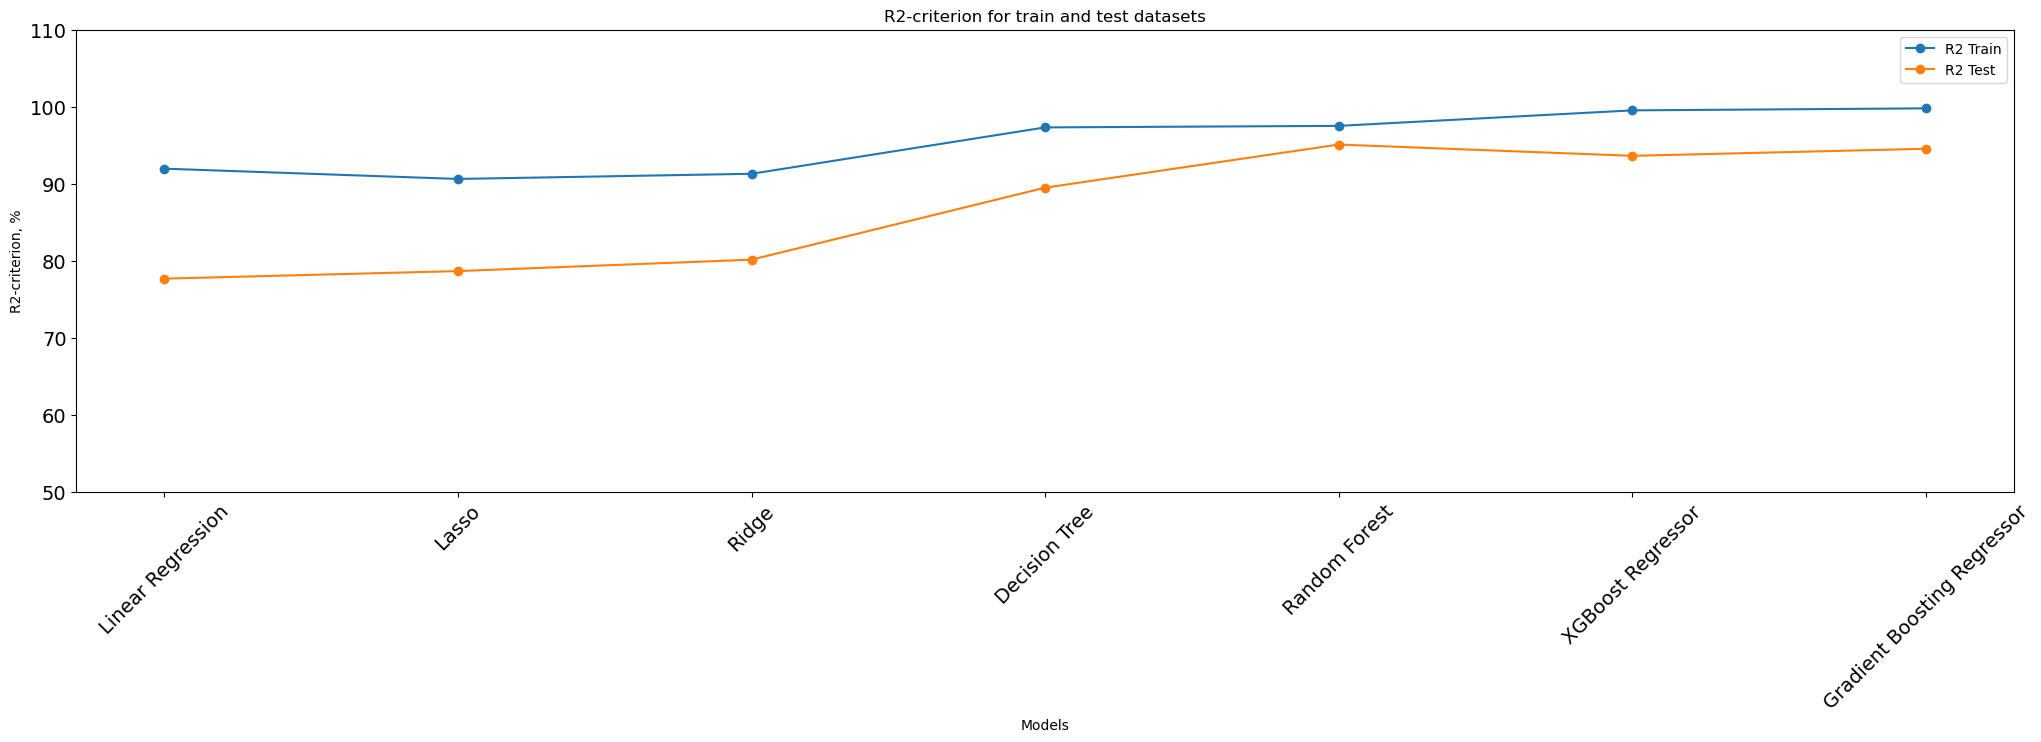

In [235]:
plt.figure(figsize=[25,6])
# fig = px.line(model_evaluation, x=model_evaluation['Model Name'], y=model_evaluation['Train_R2_Score'], name='r2 score')
# sns.lineplot(data=model_evaluation, x=model_evaluation['Model Name'], y=model_evaluation['Train_R2_Score'])

plt.tick_params(labelsize=14)
plt.plot(model_evaluation['Model Name'], model_evaluation['Train_R2_Score']*100, label='R2 Train', marker='o')
plt.plot(model_evaluation['Model Name'], model_evaluation['Test_R2_Score']*100, label='R2 Test',  marker='o')
plt.legend()
plt.title('R2-criterion for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(rotation=45)
plt.ylim(50, 110)
plt.show()

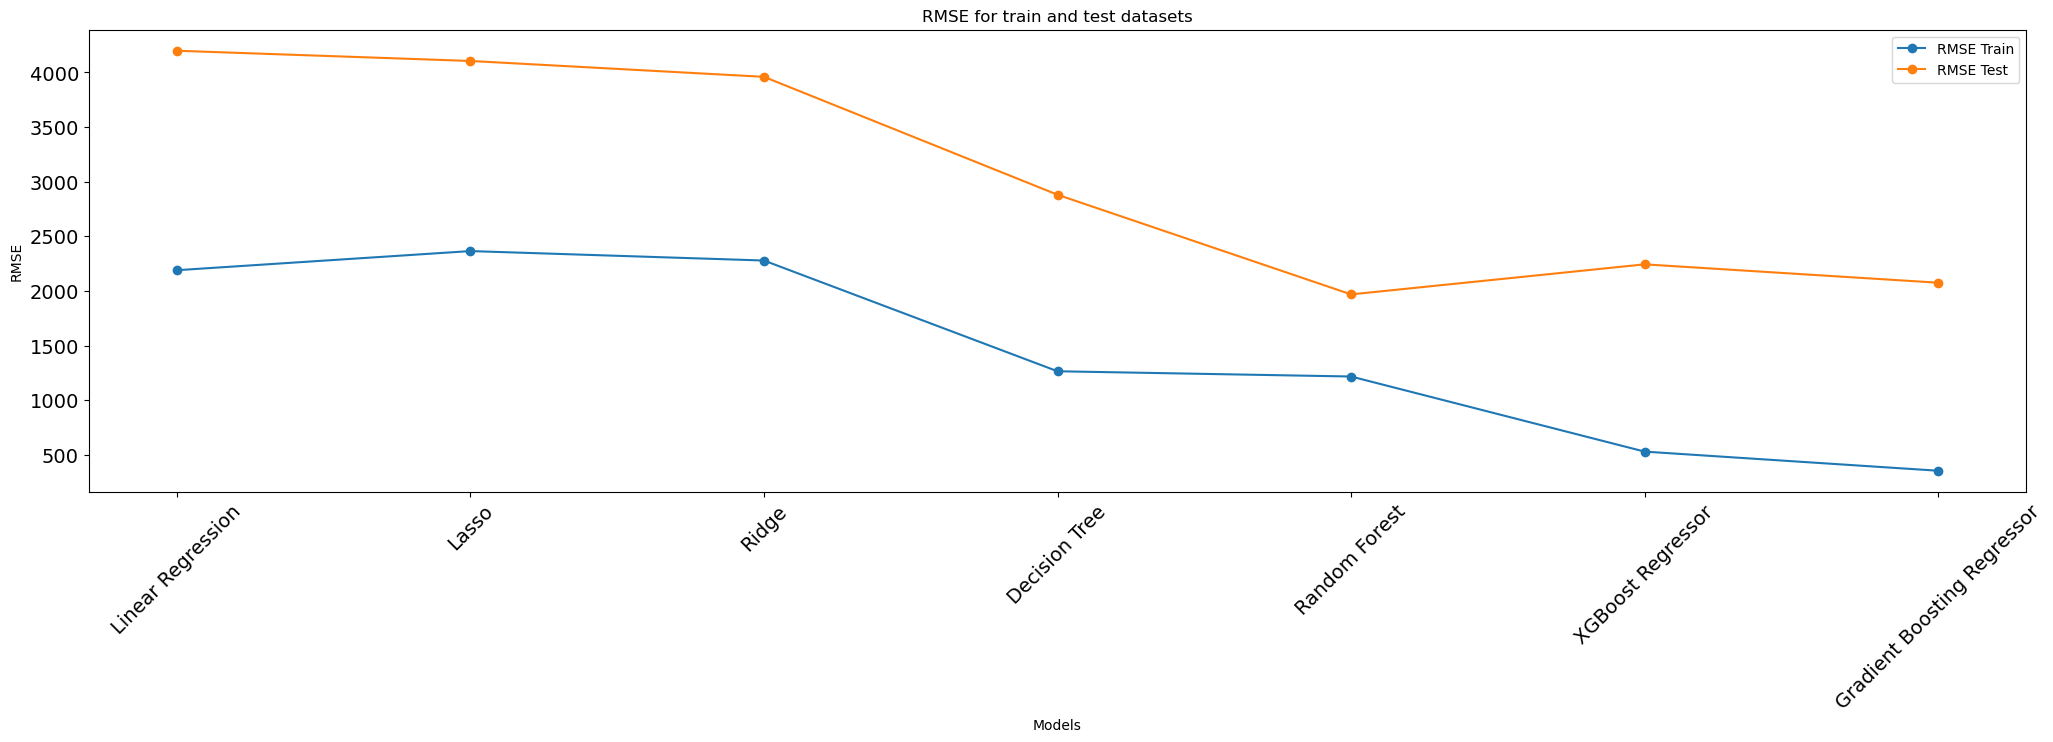

In [237]:
plt.figure(figsize=[25,6])

plt.tick_params(labelsize=14)
plt.plot(model_evaluation['Model Name'], model_evaluation['Train_RMSE'], label='RMSE Train', marker='o')
plt.plot(model_evaluation['Model Name'], model_evaluation['Test_RMSE'], label='RMSE Test',marker='o')
plt.legend()
plt.title('RMSE for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
# plt.ylim(50, 110)
plt.show()

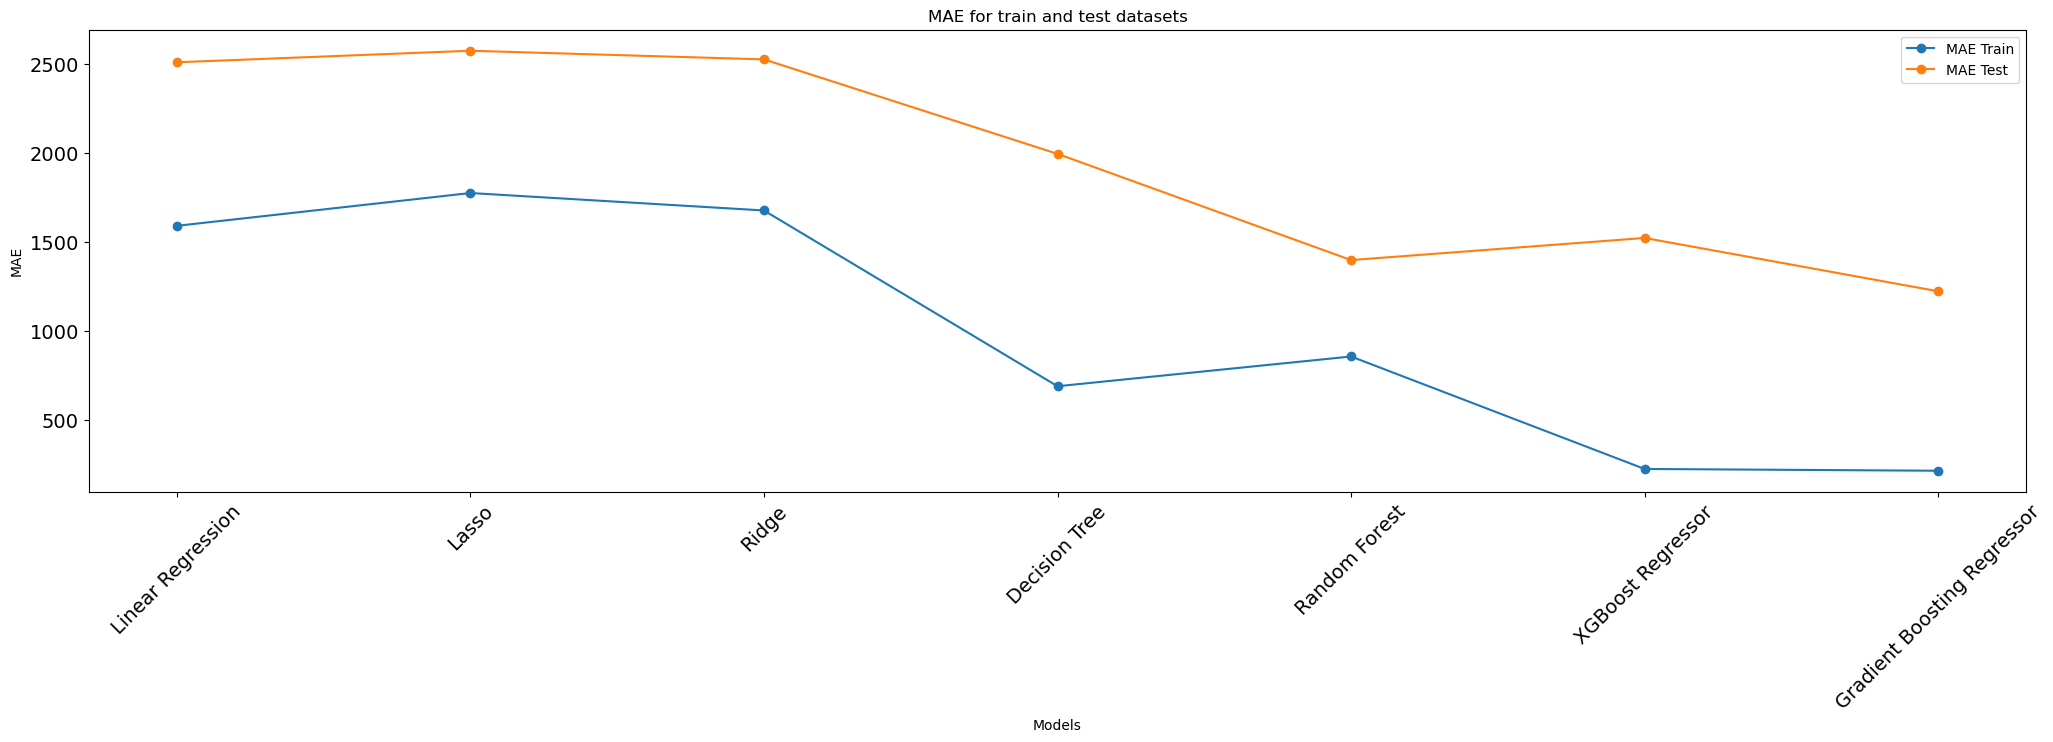

In [239]:
plt.figure(figsize=[25,6])

plt.tick_params(labelsize=14)
plt.plot(model_evaluation['Model Name'], model_evaluation['Train_MAE'], label='MAE Train', marker='o')
plt.plot(model_evaluation['Model Name'], model_evaluation['Test_MAE'], label='MAE Test', marker='o')
plt.legend()
plt.title('MAE for train and test datasets')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
# plt.ylim(50, 110)
plt.show()


# Model Performance Analysis:
Based on the R2 scores, here's a comparison of the models:

1. Gradient Boosting Regressor: This model consistently outperforms the others, achieving the highest R2 scores for both training and testing data. This suggests it's the most effective model for predicting car prices in this dataset.
2. XGBoost Regressor: While slightly behind the Gradient Boosting Regressor, XGBoost also exhibits excellent performance, especially on the training set.
3. Random Forest: Random Forest shows good performance, but it's outperformed by Gradient Boosting and XGBoost.
4. Decision Tree: The Decision Tree model has the lowest R2 scores among the ensemble methods, indicating it might not capture the complex relationships in the data as effectively as the other models.
5. Linear Regression, Lasso, and Ridge: These linear models perform similarly, with R2 scores around 90%. While they might be simpler to interpret, they might not capture non-linear relationships in the data as well as the ensemble methods.

## Key Observations:

Ensemble Methods Dominate: The ensemble methods (Gradient Boosting, XGBoost, and Random Forest) generally outperform the linear models. This suggests that combining multiple models can improve predictive power.
Overfitting Concern: The gap between training and testing R2 scores for some models (especially the Decision Tree) might indicate overfitting. This means the models are learning the training data too well but might not generalize well to new, unseen data.
Data Quality and Feature Engineering: The performance of the models is also influenced by the quality of the data and the choice of features. Ensuring data cleanliness and selecting relevant features can significantly impact model accuracy


## Conclusion:

Based on the R2 scores, Gradient Boosting Regressor and Random Forest appears to be the best model for predicting car prices in this dataset. However, it's essential to consider other factors like interpretability, computational cost, and the specific requirements of the application before making a final decision. Additionally, exploring techniques to mitigate overfitting and further refine feature engineering might lead to even better results.